<a href="https://colab.research.google.com/github/vachaspathi6/Techno_Hacks/blob/main/Employee_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Turnover Prediction**

Building a model to predict employee attrition (the likelihood of employees leaving the company) is a common application of machine learning in HR analytics

Employee Attrition Analysis Report

**Introduction:**

This report presents an analysis of employee attrition within the organization based on a comprehensive dataset. Employee attrition, the rate at which employees leave a company, is a critical factor in understanding organizational health and employee satisfaction. By exploring various aspects of the dataset, including demographic information, job-related factors, and employee feedback, this analysis aims to uncover patterns, correlations, and potential insights that can guide human resources strategies to address attrition and enhance workplace satisfaction.

The analysis process involves several steps, including data loading, exploratory data analysis, visualization of key variables, and the examination of relationships between variables. By investigating factors that may contribute to employee attrition, this analysis aims to provide actionable recommendations for improving employee retention and overall workplace experience.

**Table of Contents:**

*   Data Loading and Preprocessing
*   Exploratory Data Analysis
*   Attrition Distribution and Demographics
*   Correlation Analysis and Insights
*   Scatter Plots and Trends
*   Pair Plots for Variable Relationships
*   Conclusions and Recommendations

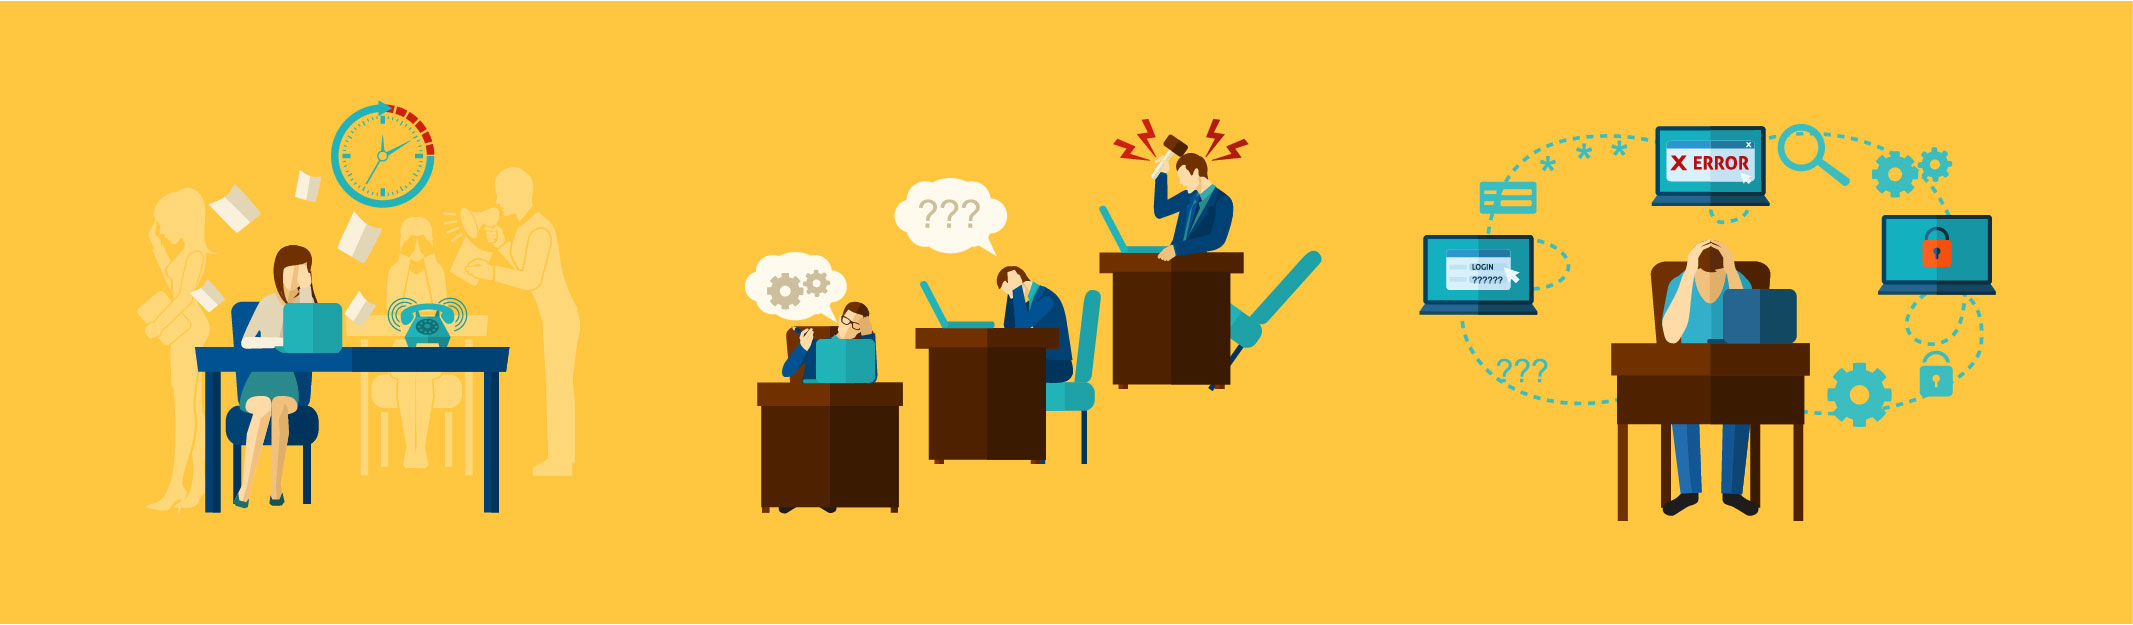

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
data = pd.read_csv('HR_Employee_Attrition.csv')
print(data.head())
print(data.info())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
# Drop unnecessary columns
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Split data into features (X) and target (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [131]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



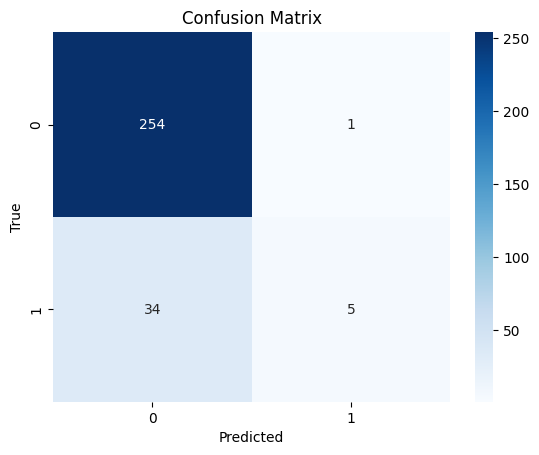

In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


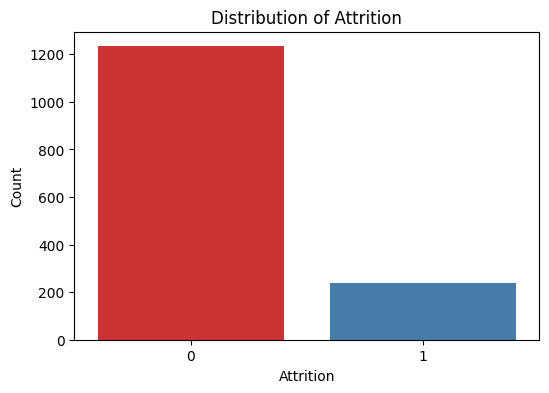

In [9]:
# Visualizations
# Distribution of Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=data, palette='Set1')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


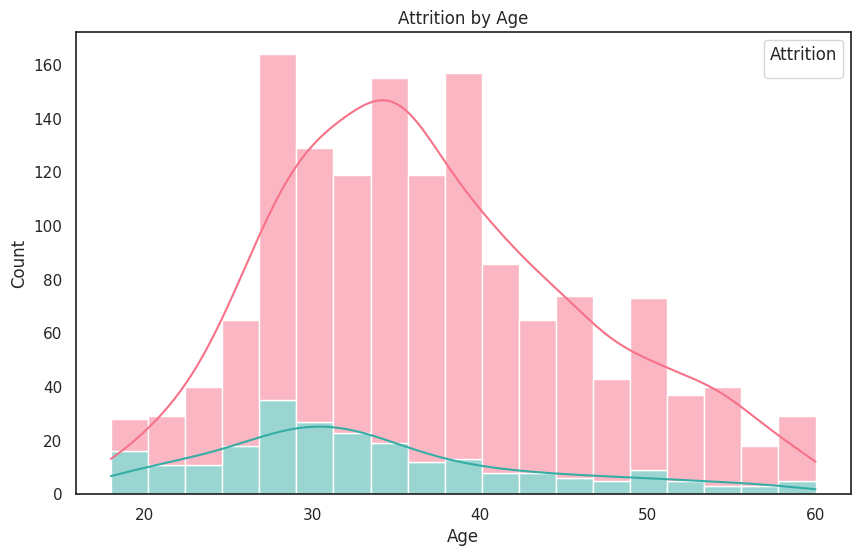

In [137]:
# Attrition by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()


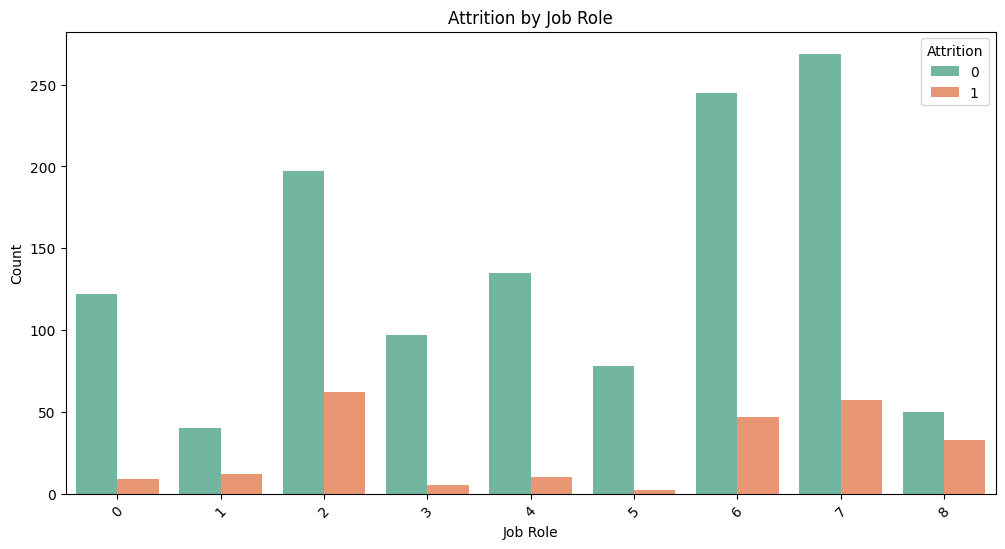

In [11]:
# Attrition by Job Role
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()


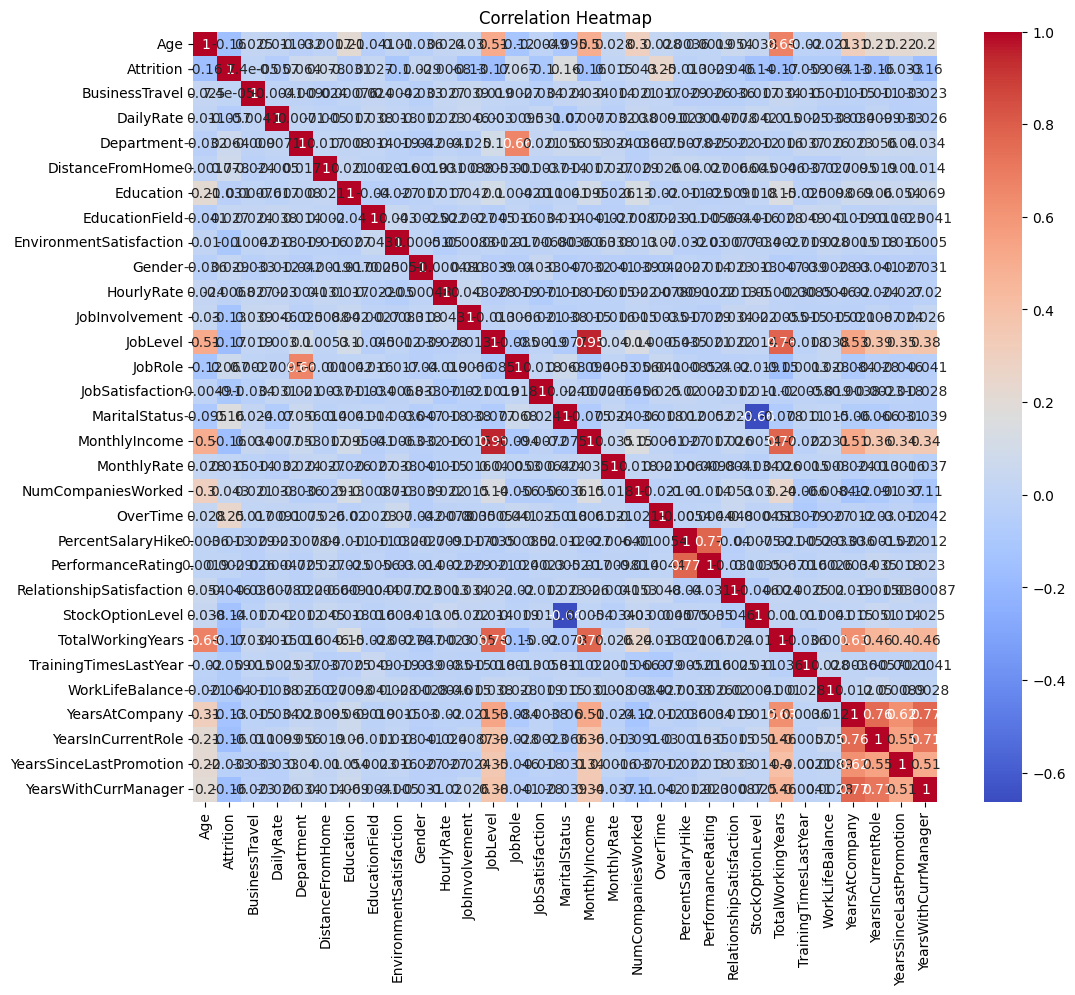

In [12]:

# Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

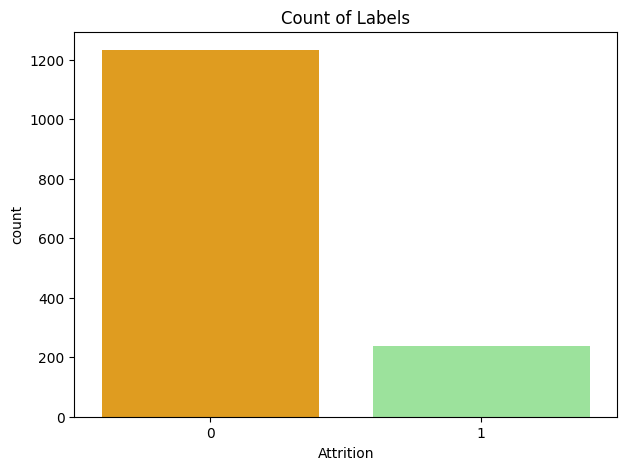

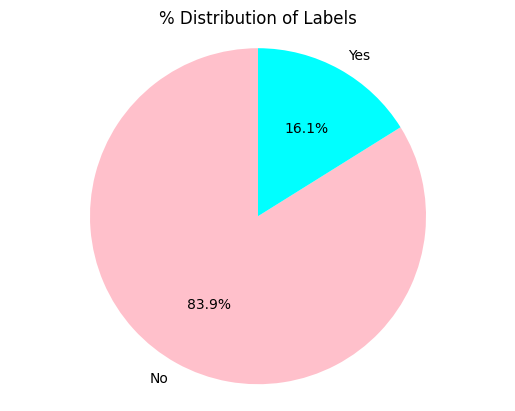

In [19]:
labels = ['Yes' if i==1 else 'No' for i in data['Attrition'].value_counts().index]

plt.figure(figsize=(7,5))
sns.countplot(x='Attrition',data=data,palette=['orange','lightgreen'])
plt.title("Count of Labels")
plt.show()



label_counts = [round(i/len(data)*100,2) for i in data['Attrition'].value_counts()]
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['pink', 'aqua'])
plt.title('% Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [39]:
def plot_distribution(feature,bins=None):
    corr = data['Attrition'].corr(data[feature])
    corr = np.round(corr, 3)

    plt.figure(figsize=(8, 6))
    colors = ['orange', 'aqua']
    if bins == None:
        sns.histplot(x=feature, data=data, hue='Attrition', kde=True, palette=colors)
    else:
        sns.histplot(x=feature, data=data, hue='Attrition', kde=True, palette=colors,bins=100)


    plt.title(feature + ' (corr target = ' + str(corr) + ')')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

def plot_countplot_with_percentage(var_select,ctg=False):
    tmp = pd.crosstab(data[var_select], data['Attrition'])
    tmp['Attr%'] = tmp[1] / (tmp[0] + tmp[1]) * 100
    if ctg == True  :
        tmp = tmp.sort_values(1, ascending = False)

    color_palette = ['skyblue', 'salmon']
    sns.set_palette(color_palette)

    plt.figure(figsize=(12, 6))

    ax = sns.countplot(x=var_select, hue='Attrition', data=data)
    ax.set_title(str(var_select))
    ax.set_ylabel('Count')
    if ctg:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


    # Plot the line plot using adjusted x-coordinates
    ax2 = ax.twinx()
    line_x = np.arange(len(tmp))
    ax2.plot(line_x, tmp['Attr%'], marker='o', color='black', label='% Attrition')
    ax2.set_ylabel('% Attrition')

    step_size = 10
    max_value = tmp['Attr%'].max() + step_size
    ax2.set_ylim(0, max_value)
    y_ticks = np.arange(0, max_value, step_size)
    ax2.set_yticks(y_ticks)


    ax.legend(['No','Yes'],loc='upper right')
    ax2.legend(loc='upper left')

    # Set x-tick positions and labels for the line plot

    plt.show()


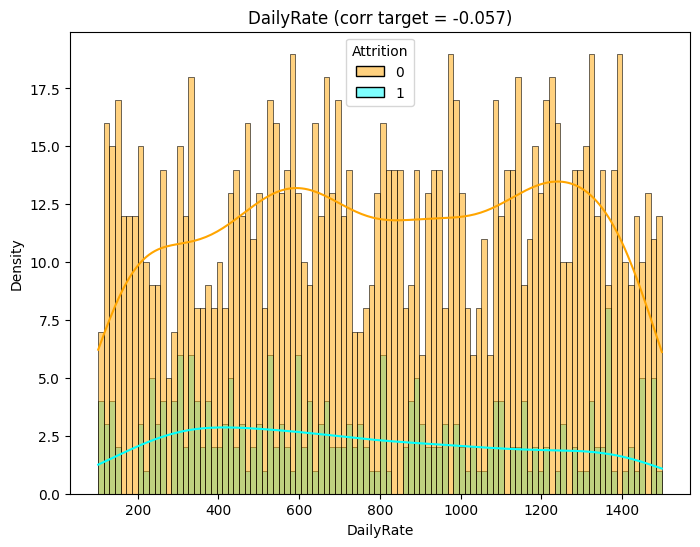

In [31]:
plot_distribution('DailyRate',100)

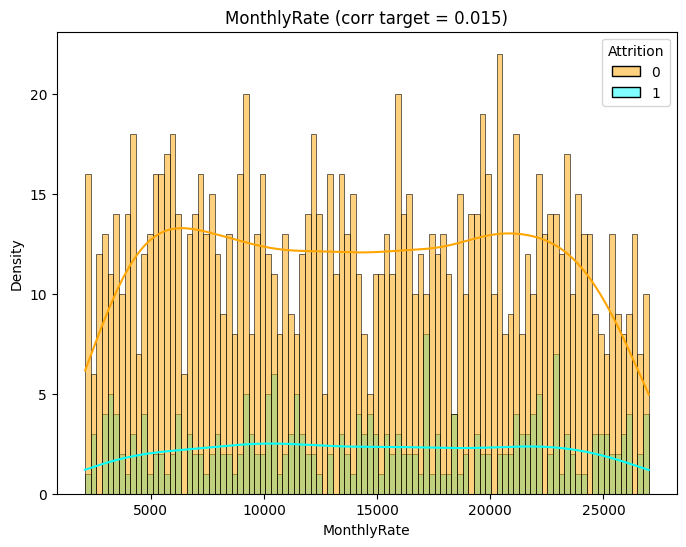

In [32]:
plot_distribution('MonthlyRate',100)

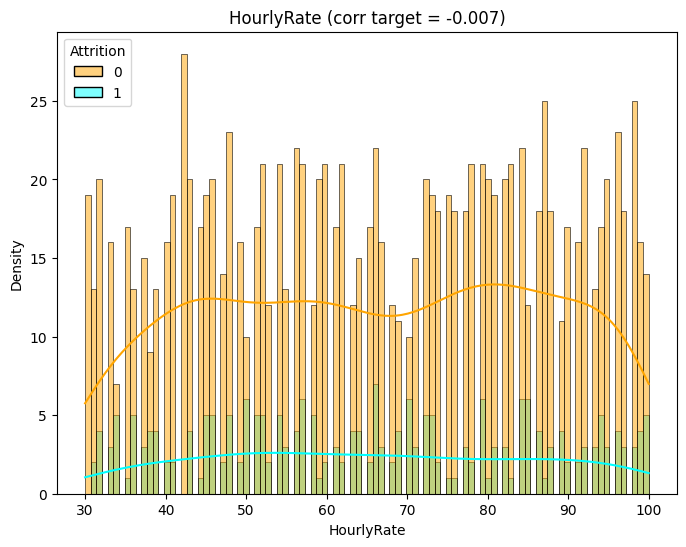

In [33]:
plot_distribution('HourlyRate',100)

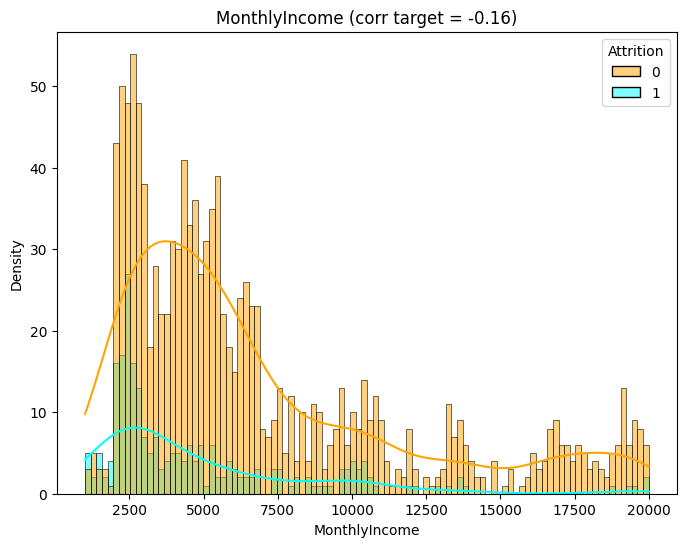

In [34]:
plot_distribution('MonthlyIncome',100)

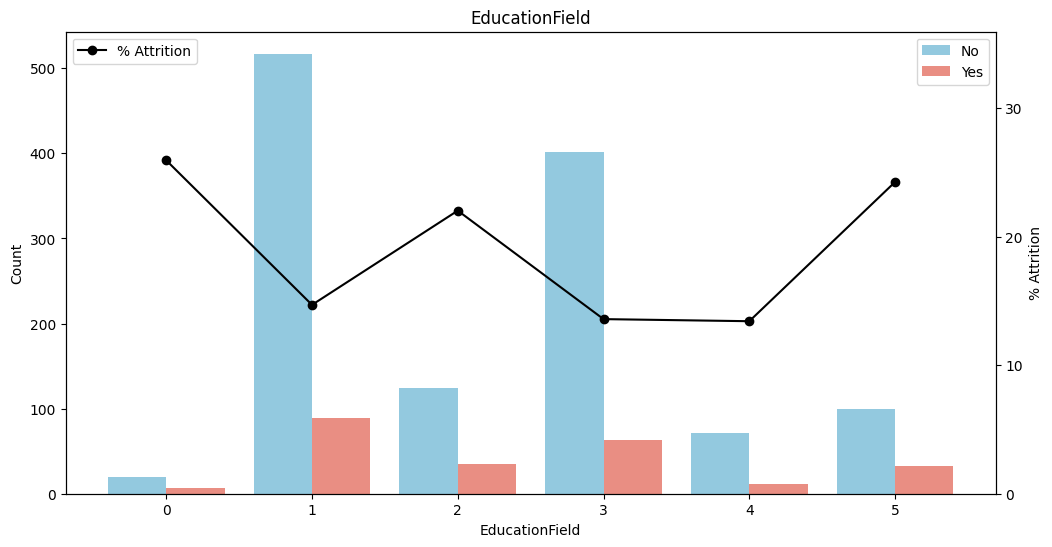

In [41]:
plot_countplot_with_percentage('EducationField')

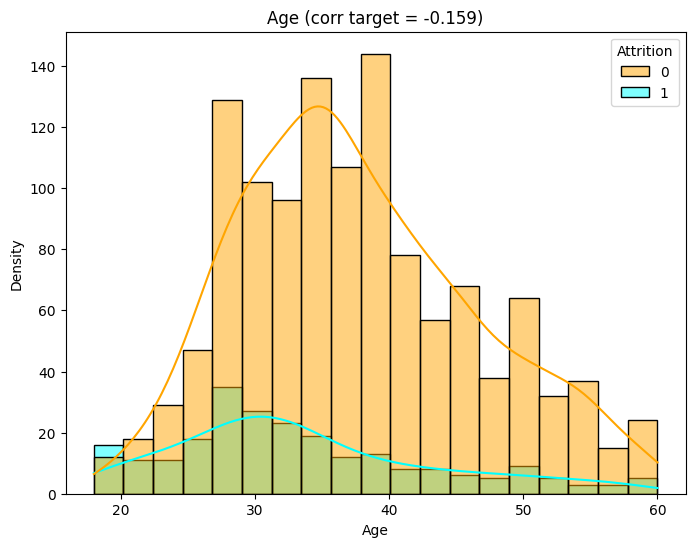

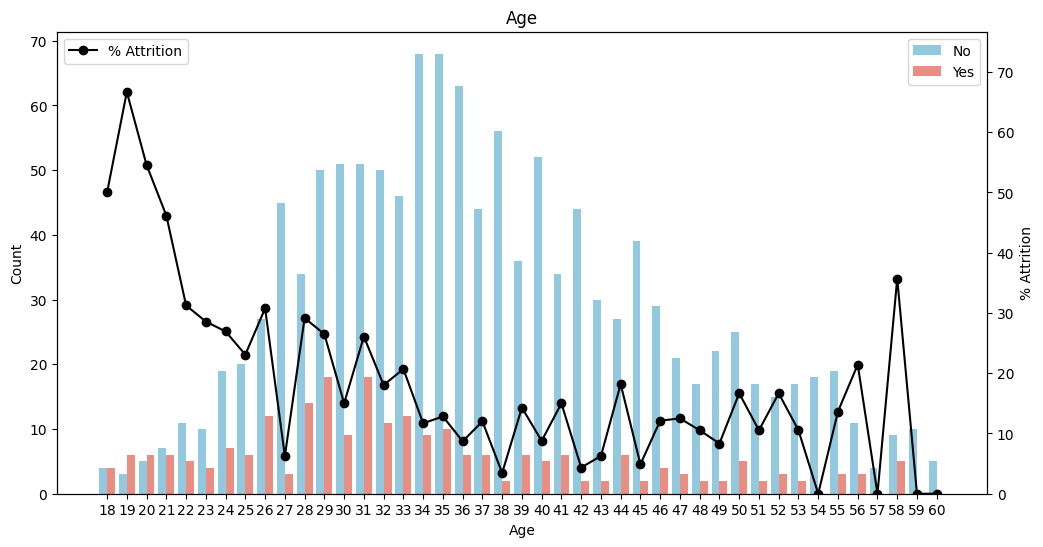

In [40]:
plot_distribution('Age')

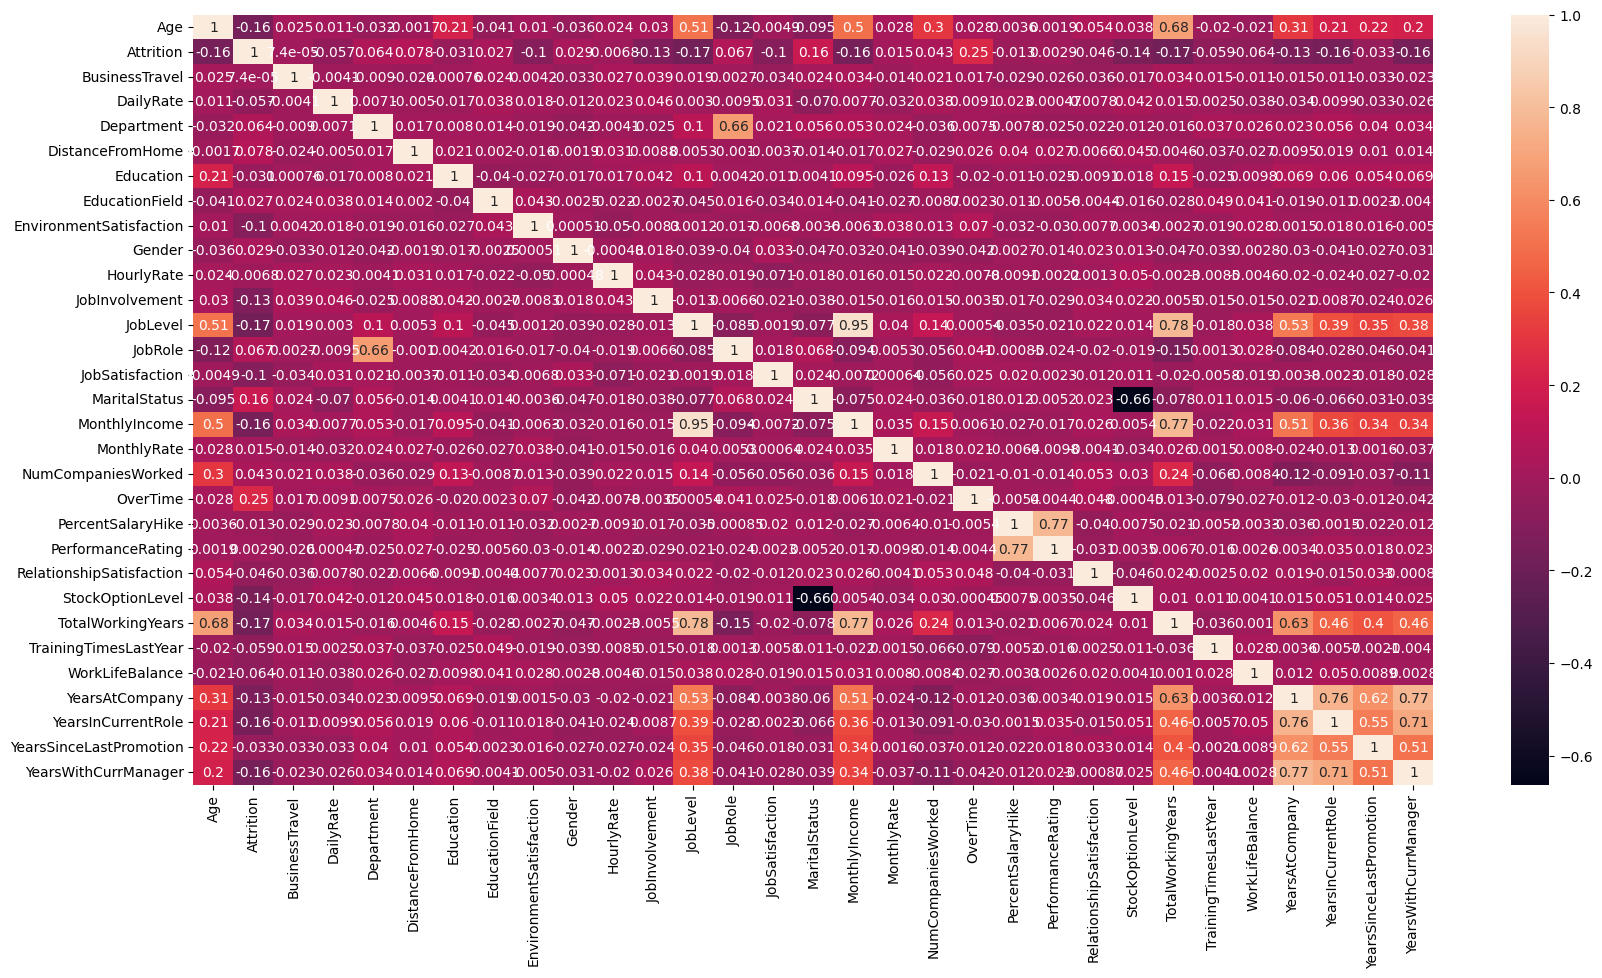

In [42]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(),annot=True,square=False)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=11)

In [48]:
feautre_sel_df = X_train.copy(deep=True)
feautre_sel_df['Attrition'] = y_train

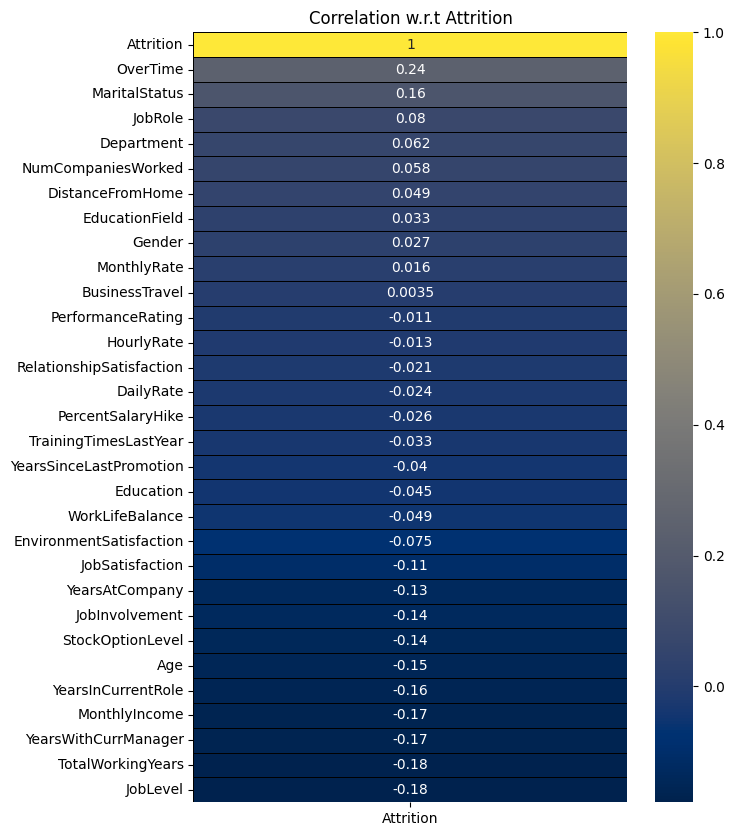

In [51]:
corr = feautre_sel_df.corrwith(feautre_sel_df['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap='cividis',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');

In [57]:
to_cat_cols = ['Education',
               'EnvironmentSatisfaction',
               'JobInvolvement',
               'JobLevel',
               'JobSatisfaction',
               'RelationshipSatisfaction',
               'StockOptionLevel',
               'WorkLifeBalance']
num_cols = [col
            for col in X_train._get_numeric_data().columns
            if col not in to_cat_cols]
cat_cols = [col
            for col in X_train.columns
            if col not in num_cols]

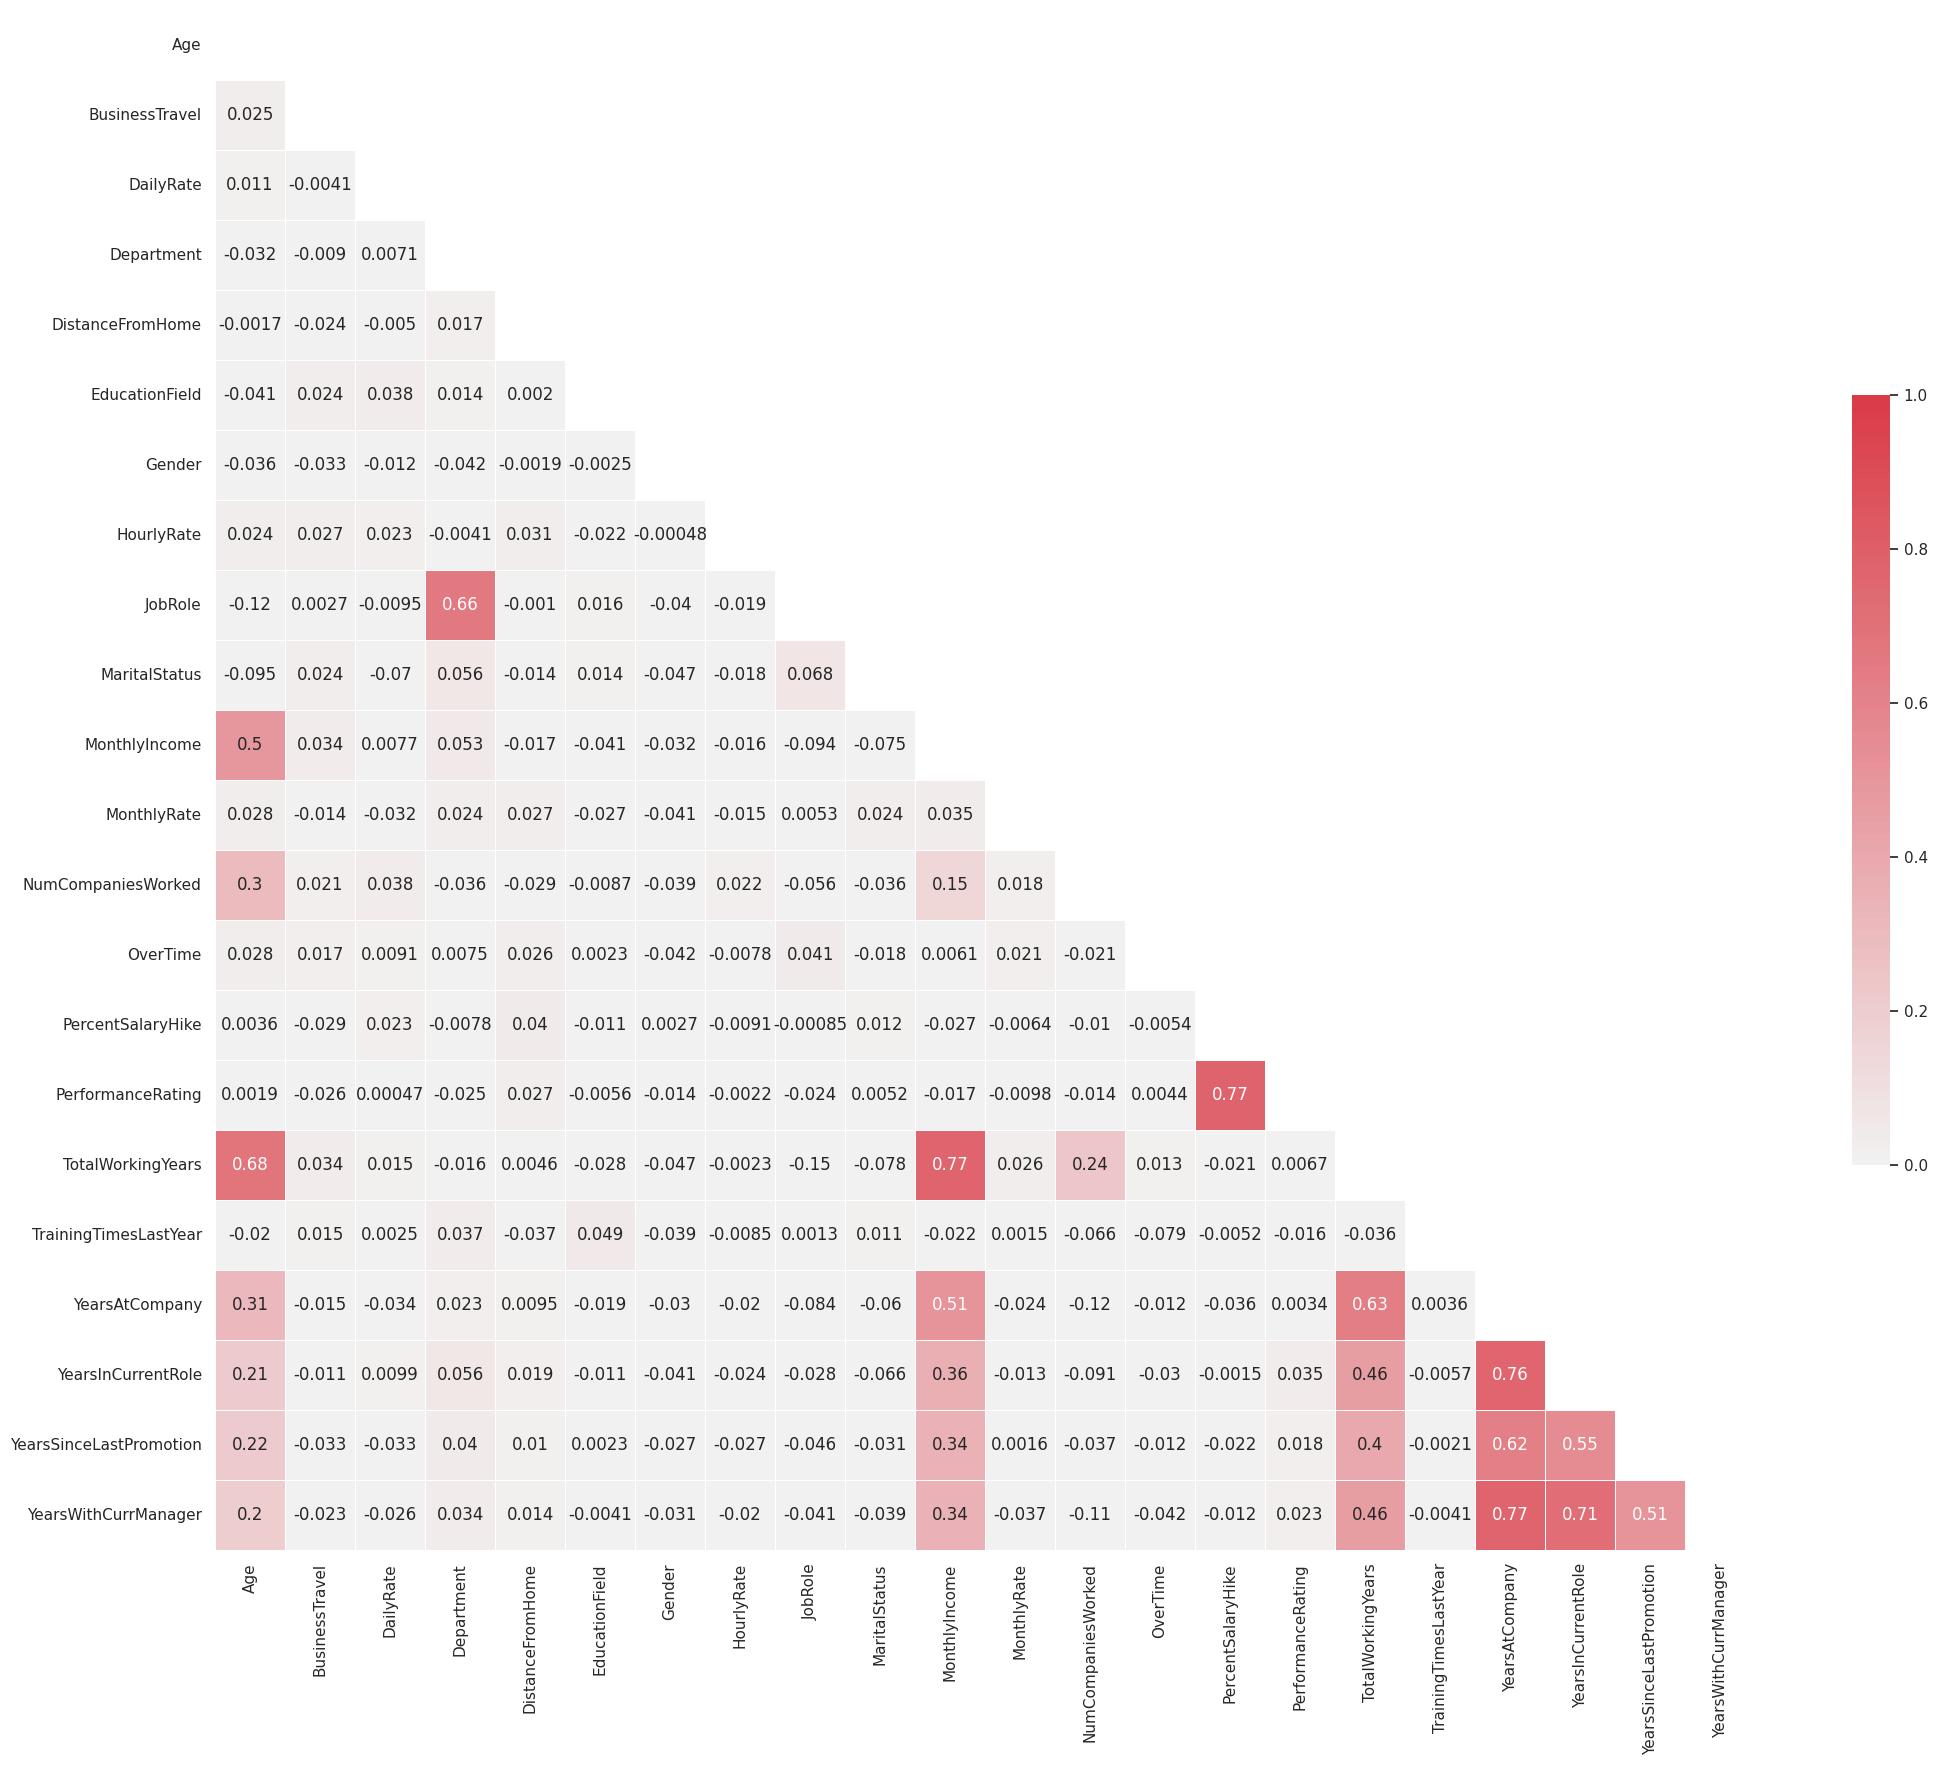

In [70]:
corr = data[num_cols].corr()
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 20))
cmap = sns.diverging_palette(100, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

In [74]:
features = data.drop("Attrition", axis=1).columns.to_list()
numerical_feat = [col for col in data.select_dtypes('int64').columns if col in features]

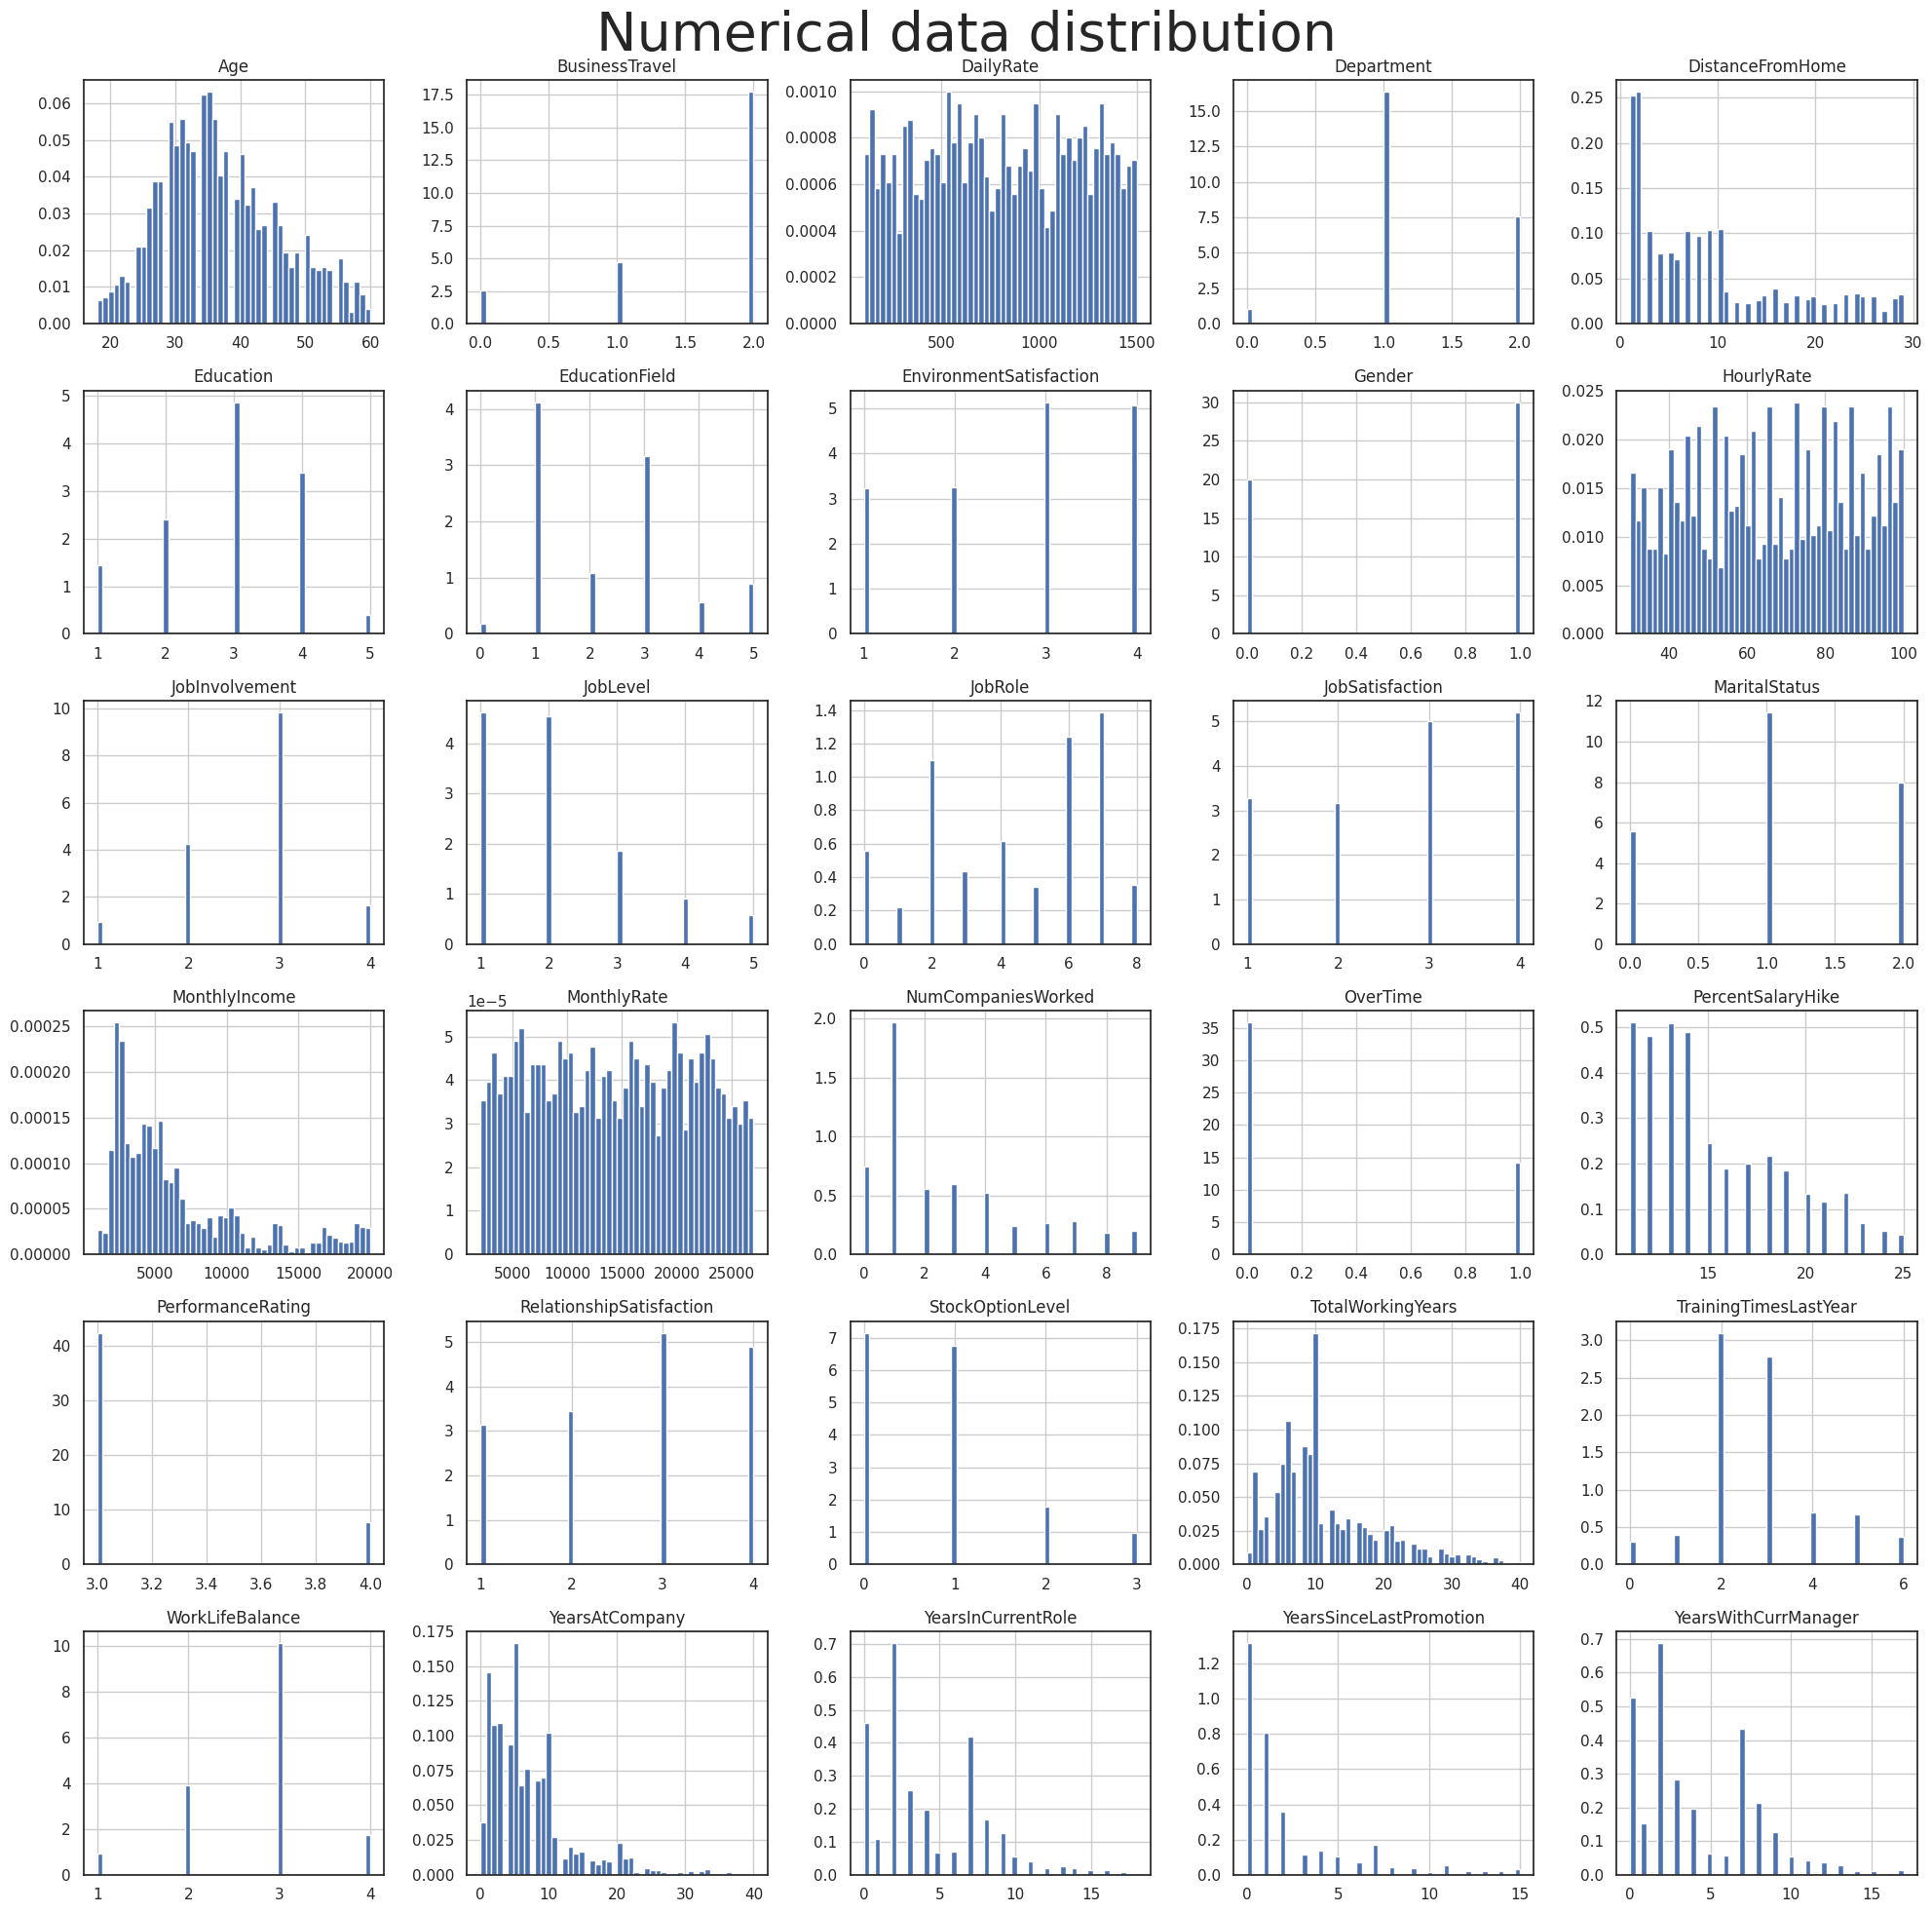

In [78]:
data[numerical_feat].hist(figsize=(20, 20), density=True, bins=50)
plt.suptitle('Numerical data distribution', fontsize=40)
plt.tight_layout()
plt.show()

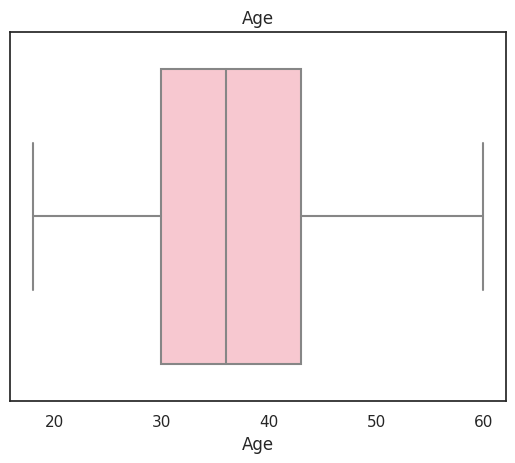

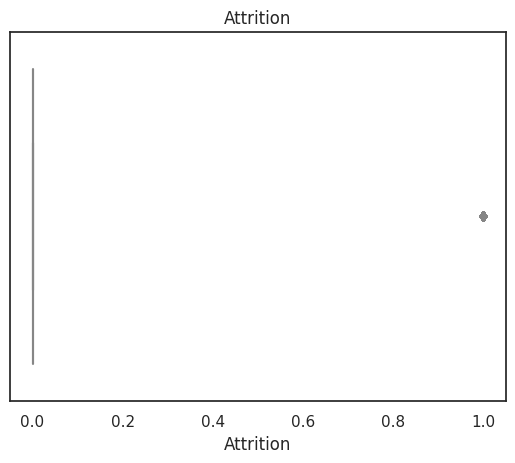

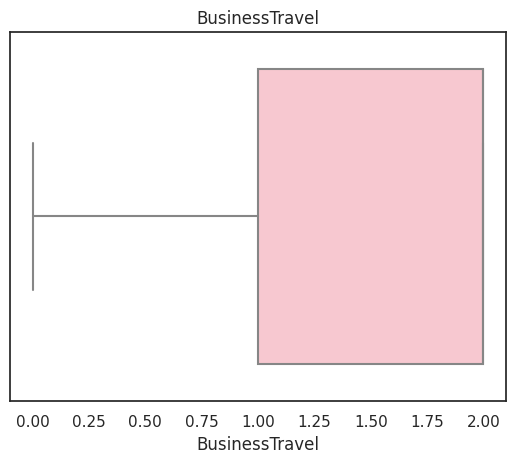

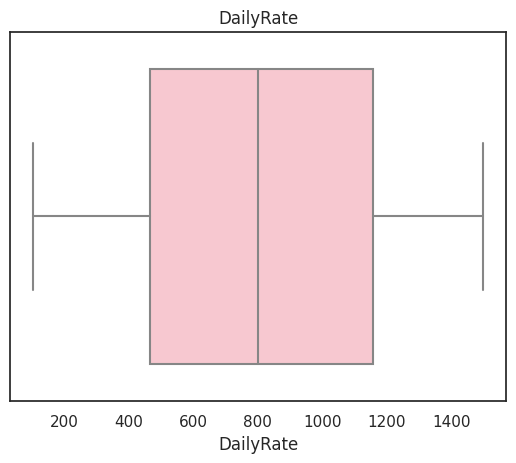

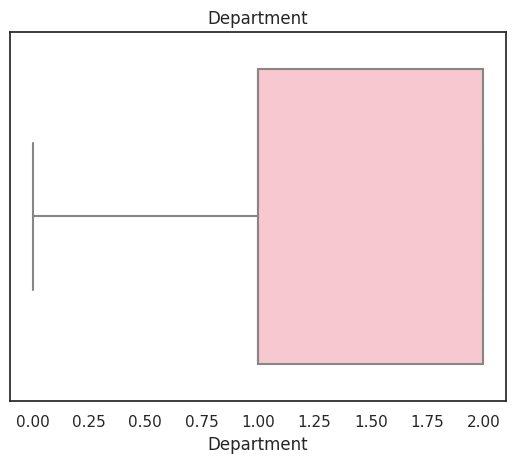

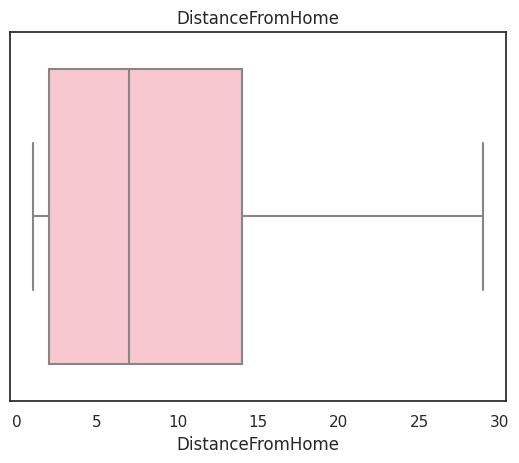

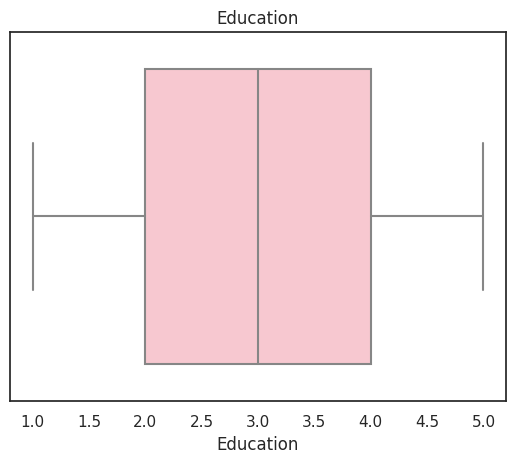

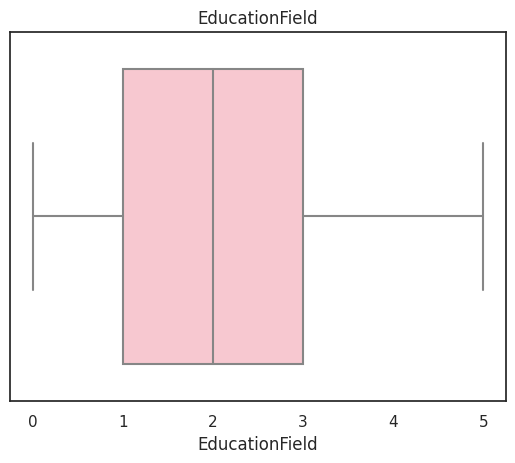

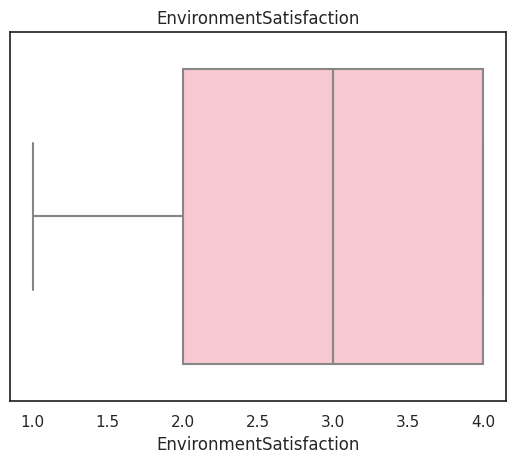

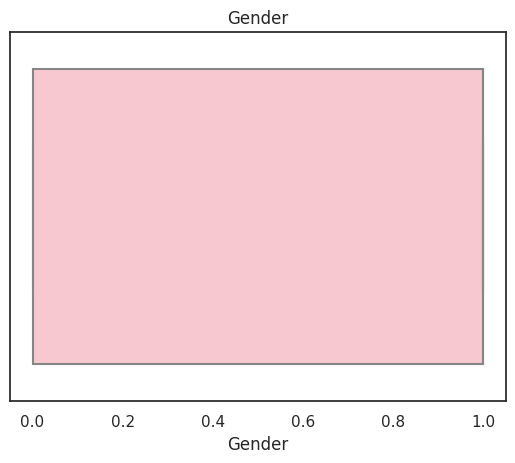

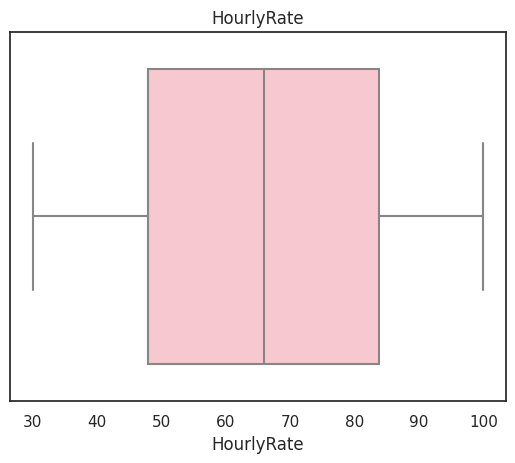

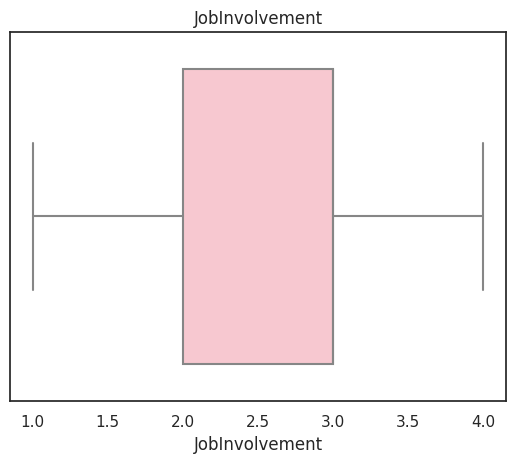

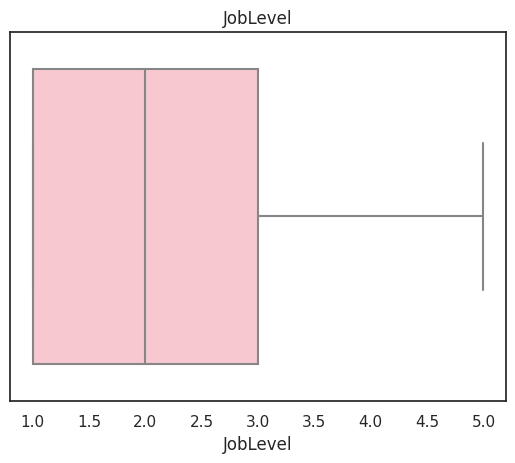

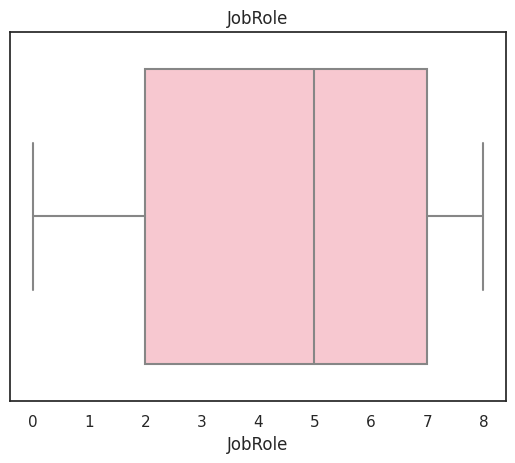

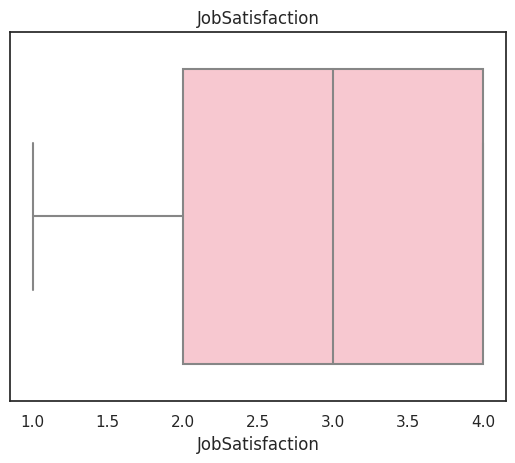

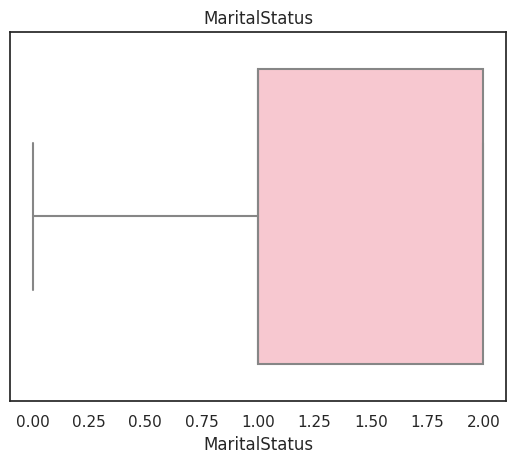

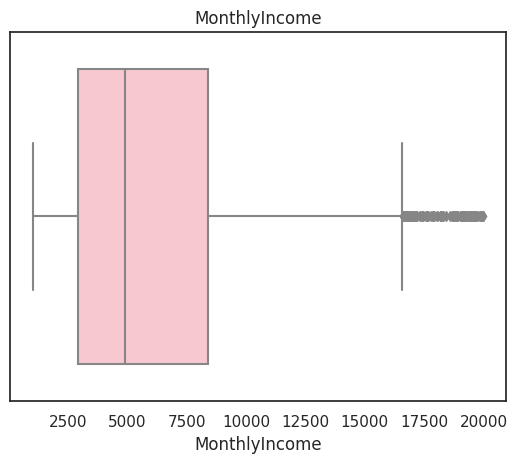

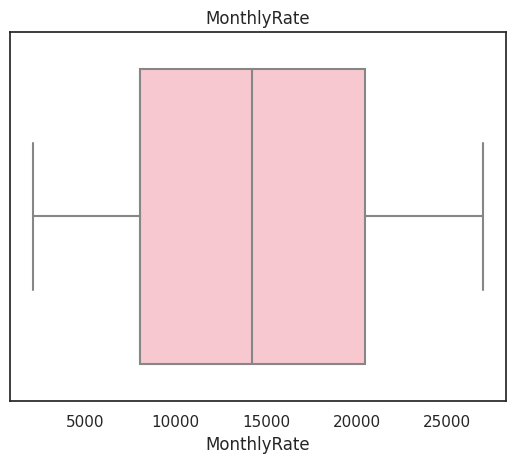

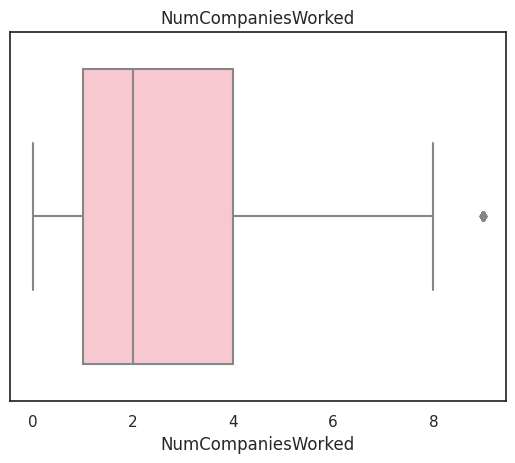

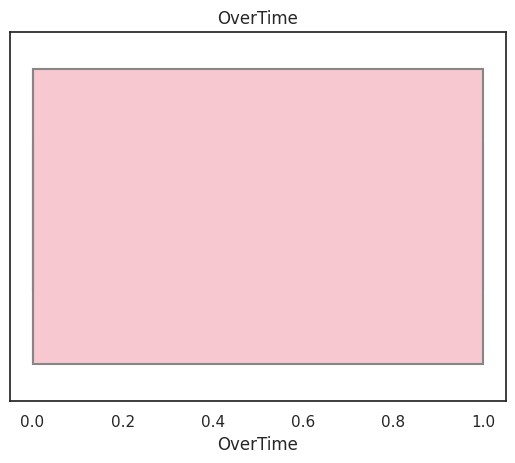

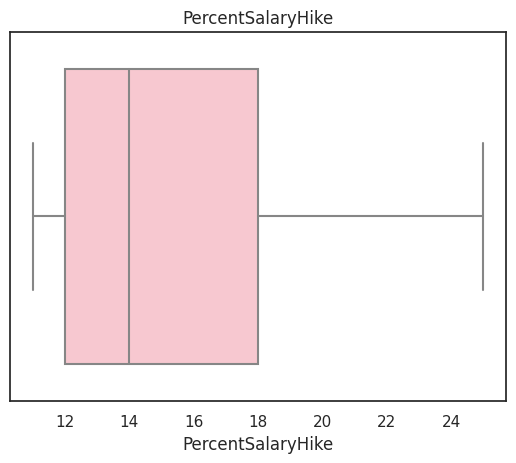

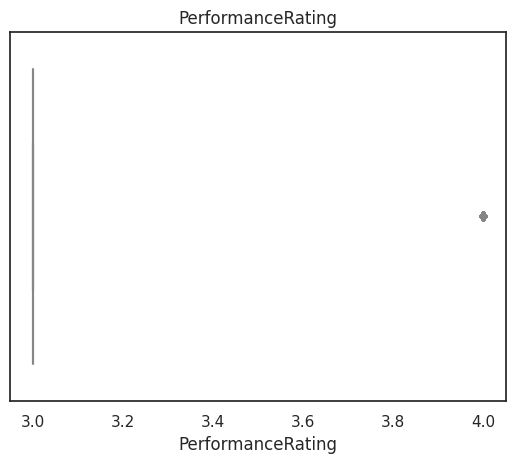

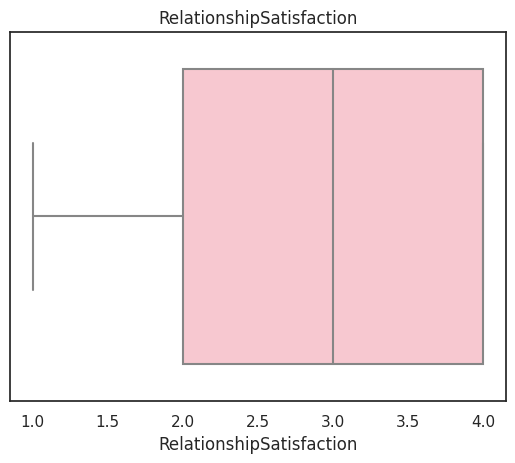

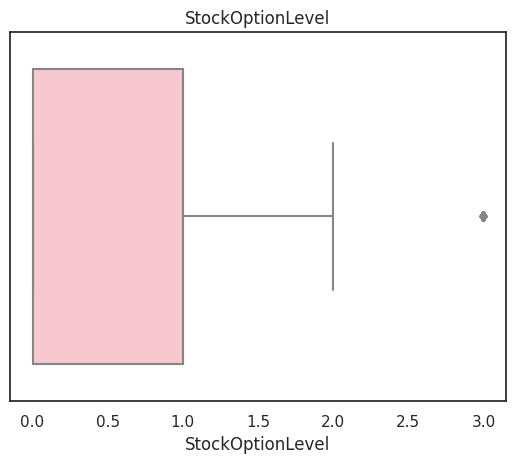

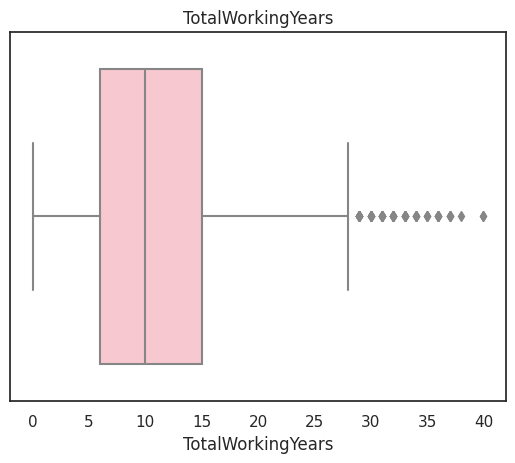

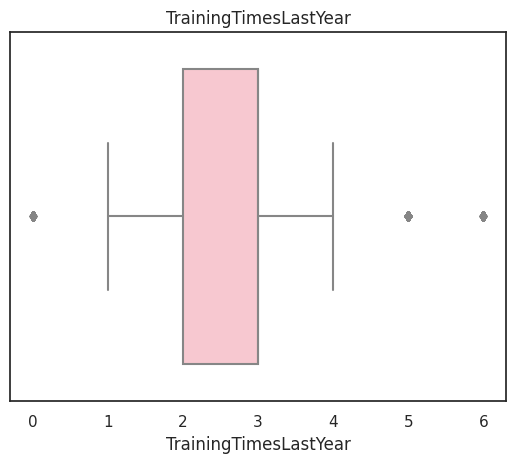

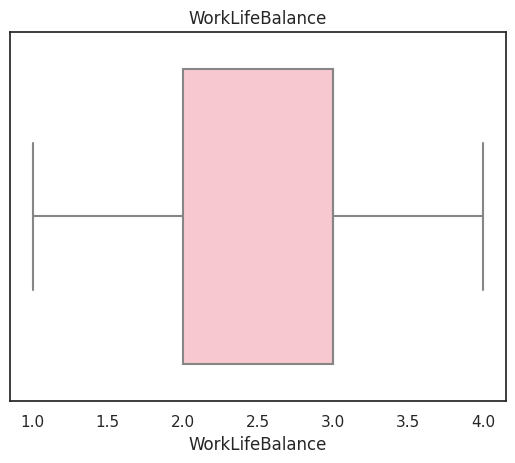

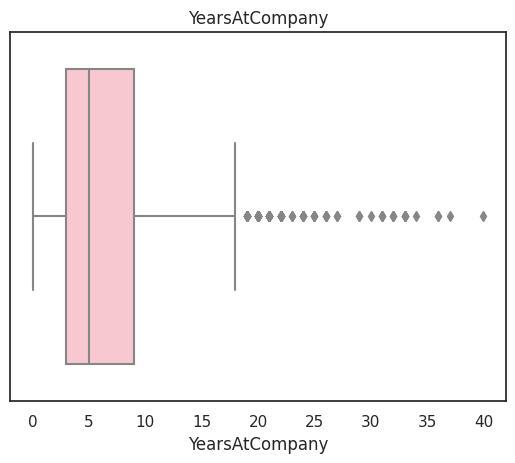

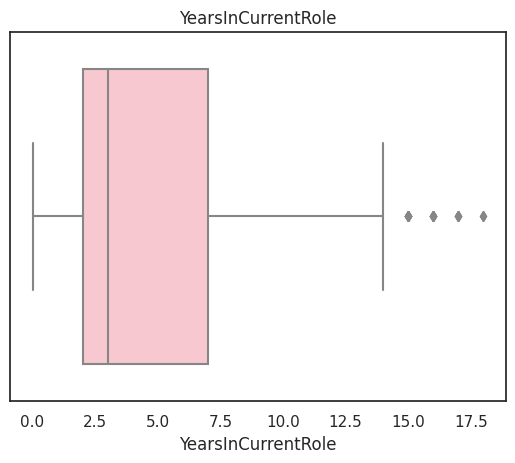

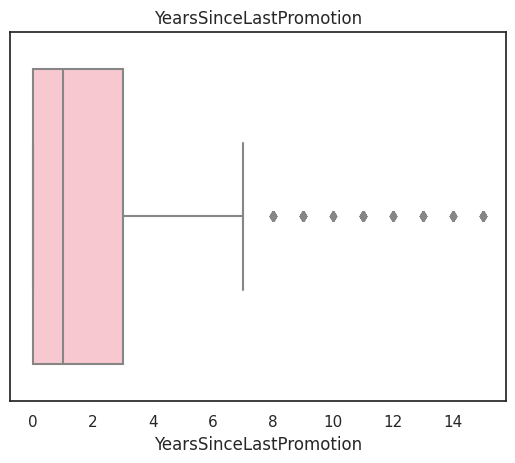

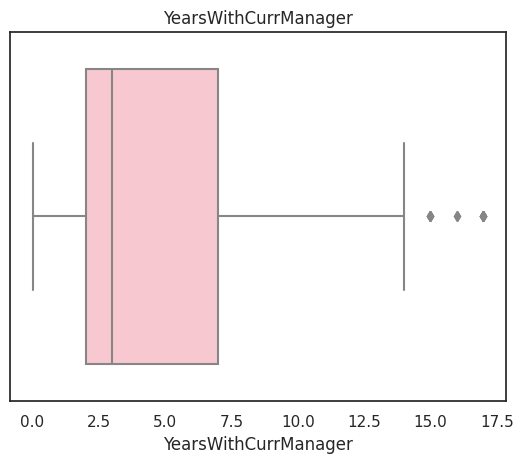

In [87]:
for i in data.select_dtypes(exclude='O'):
    sns.boxplot(x=data[i], data=data, color='pink')
    plt.title(i)
    plt.show()

In [95]:
!pip install hvplot -q
import hvplot
import hvplot.pandas

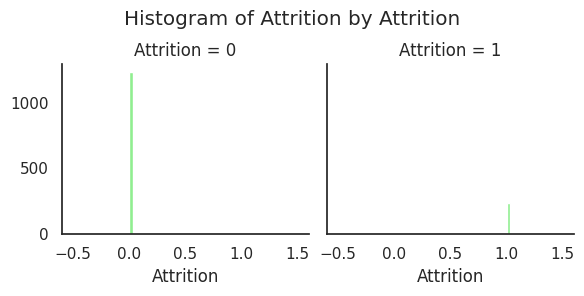

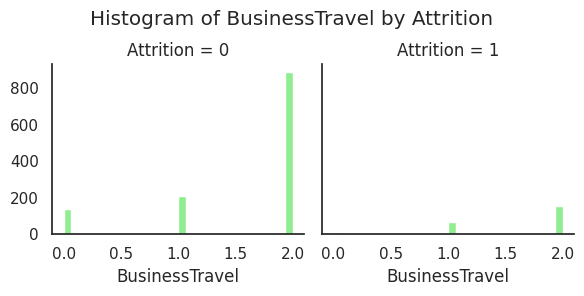

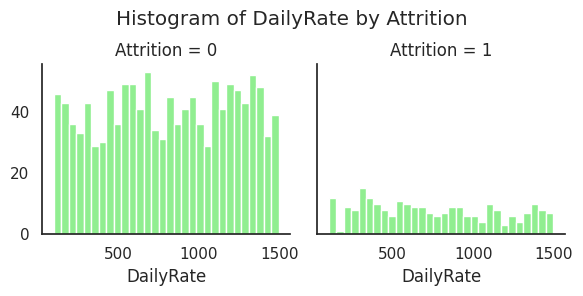

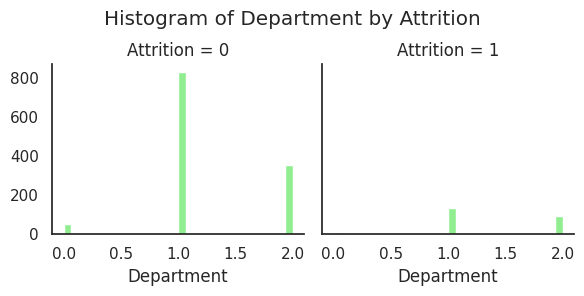

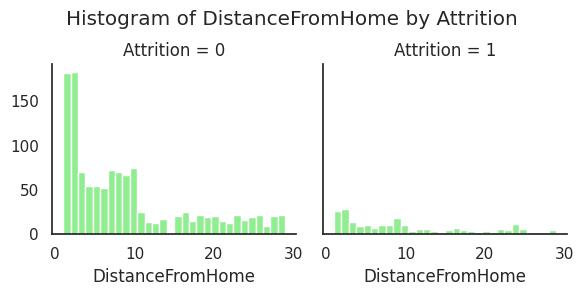

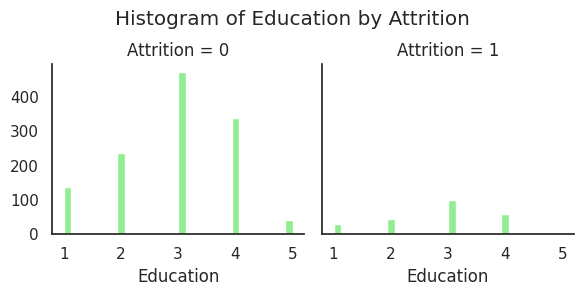

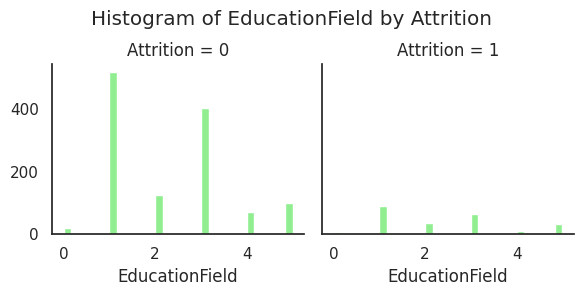

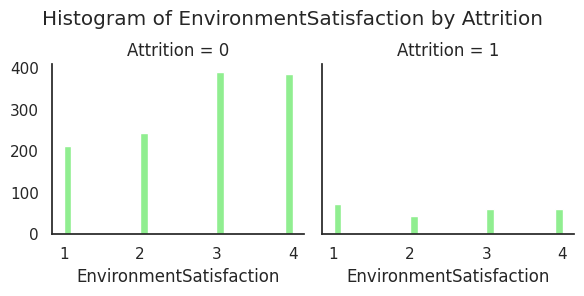

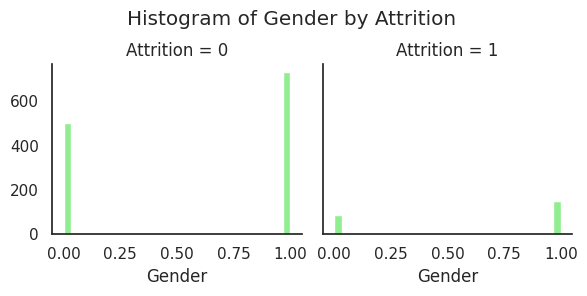

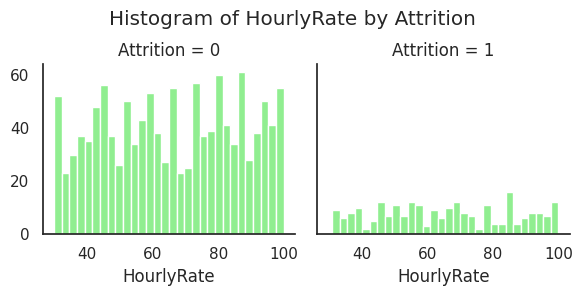

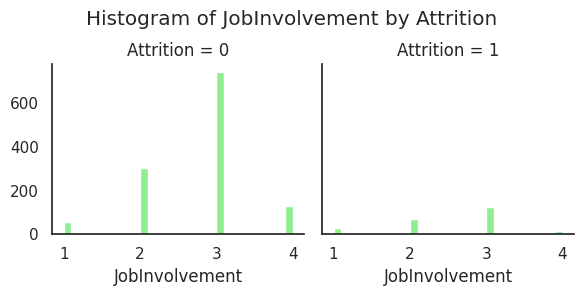

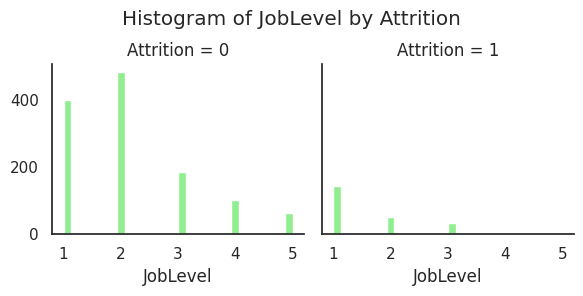

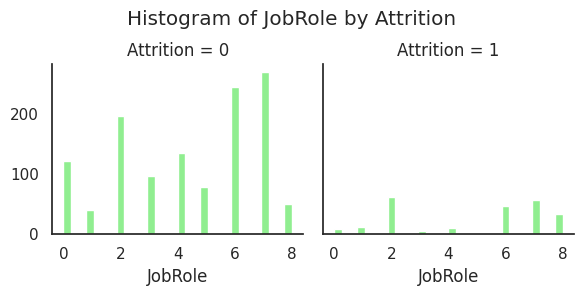

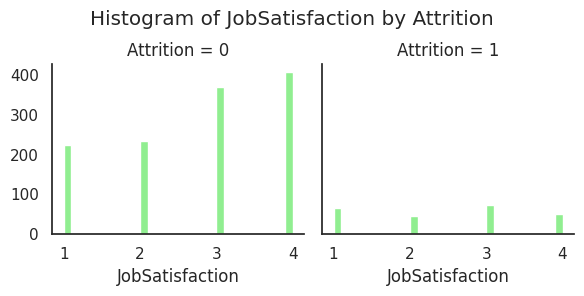

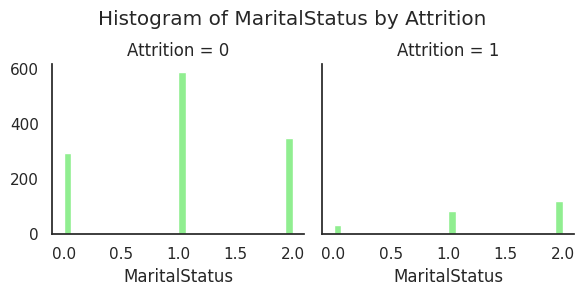

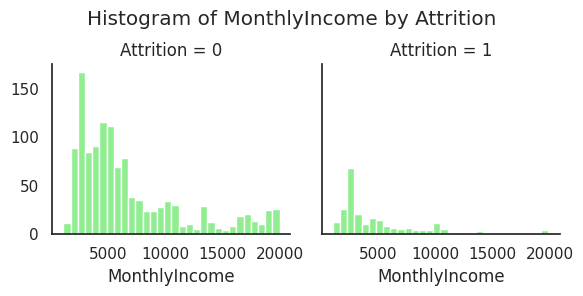

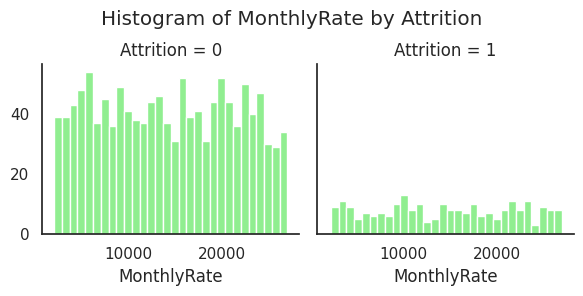

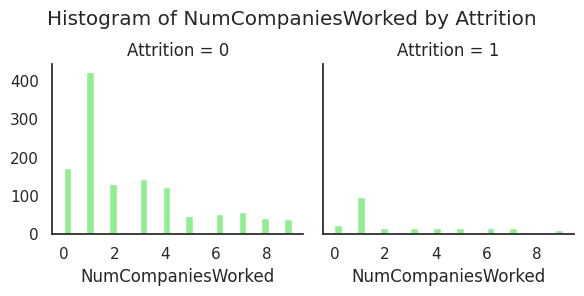

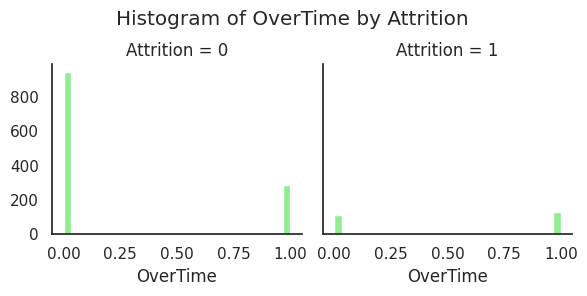

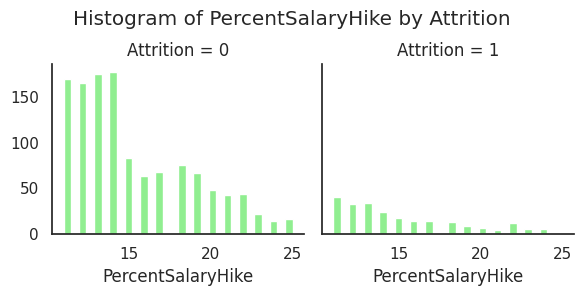

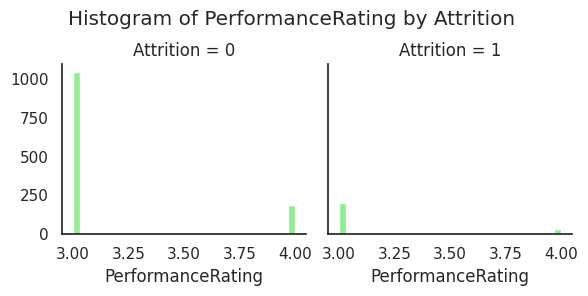

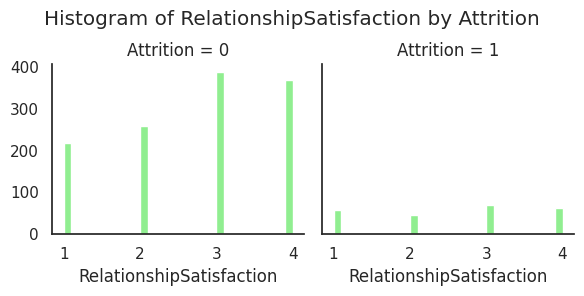

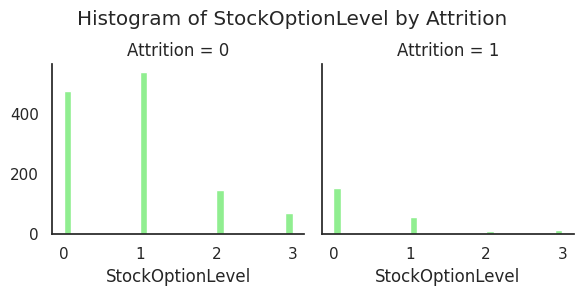

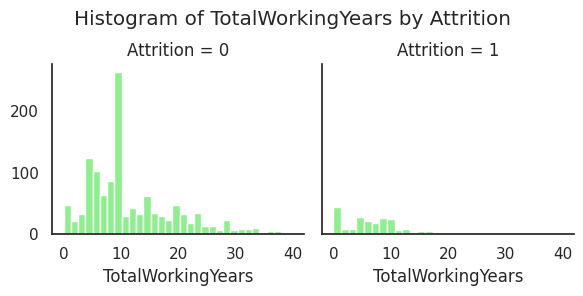

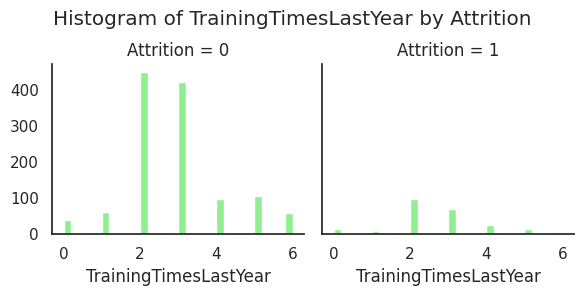

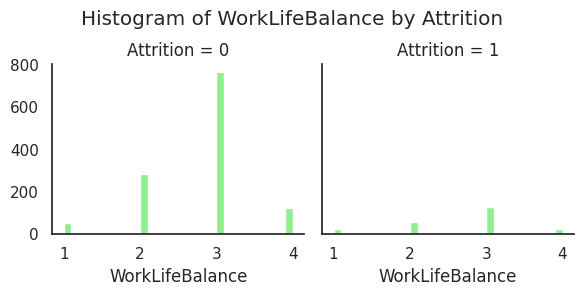

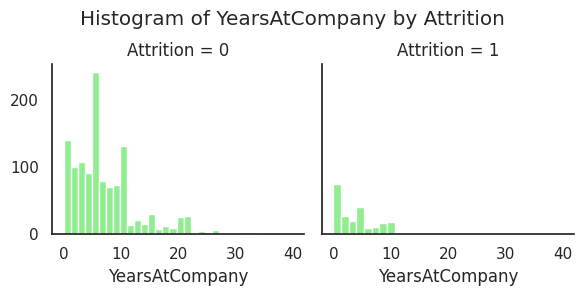

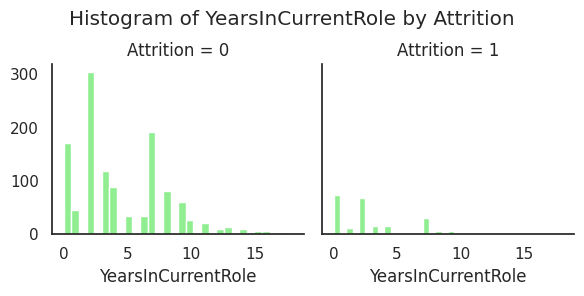

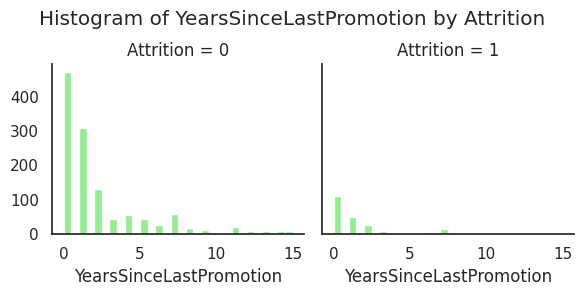

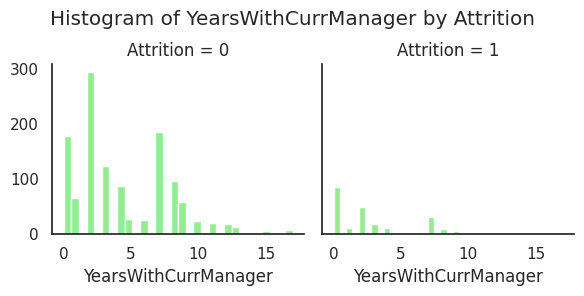

In [113]:
# Set a custom palette
custom_palette = sns.color_palette(['lightgreen'])
sns.set_palette(custom_palette)

# Select numeric columns excluding 'Age'
numeric_columns = data.select_dtypes(include=np.number).columns.difference(['Age'])

# Loop through numeric columns
for column in numeric_columns:
    g = sns.FacetGrid(data, col='Attrition')
    g.map(plt.hist, column, bins=30)
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(f'Histogram of {column} by Attrition')
    plt.show()

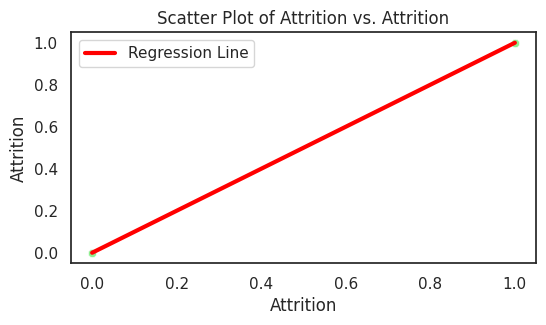

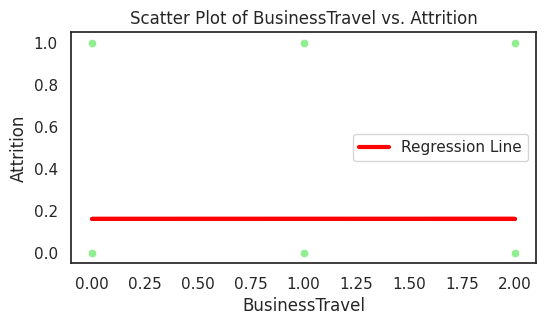

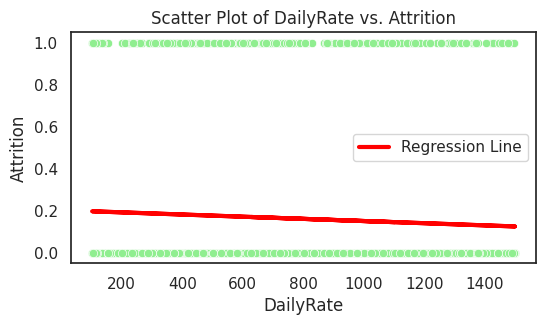

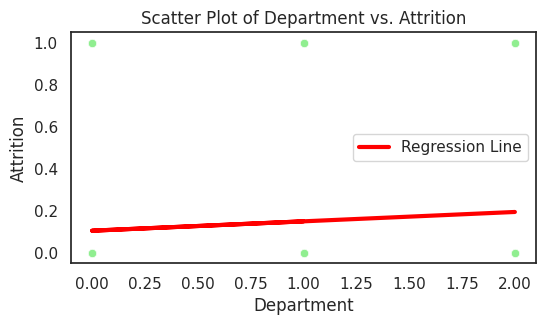

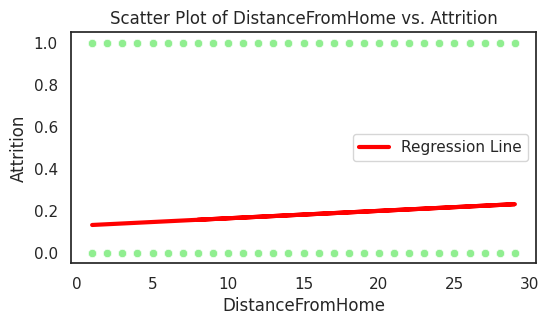

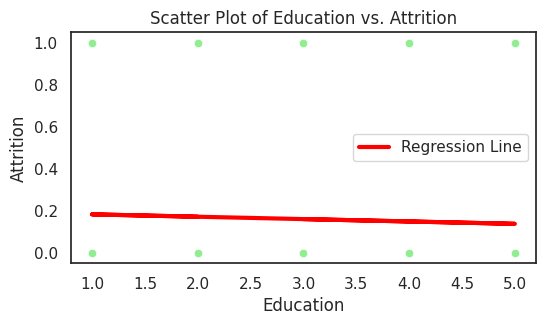

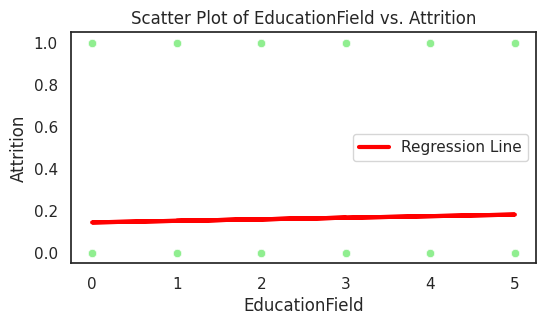

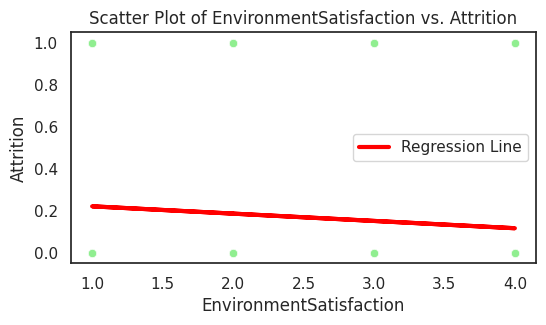

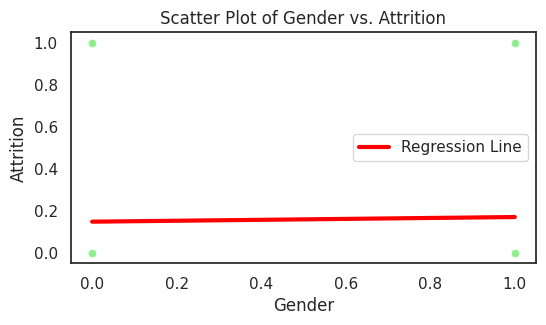

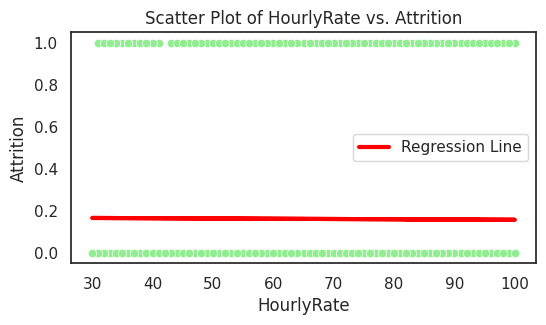

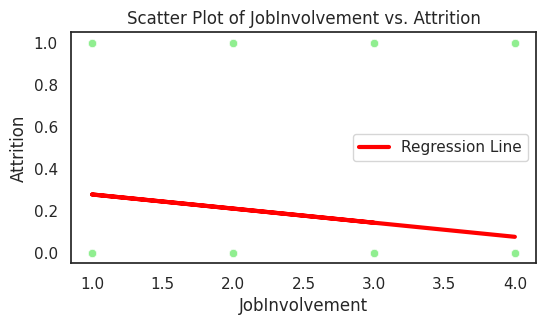

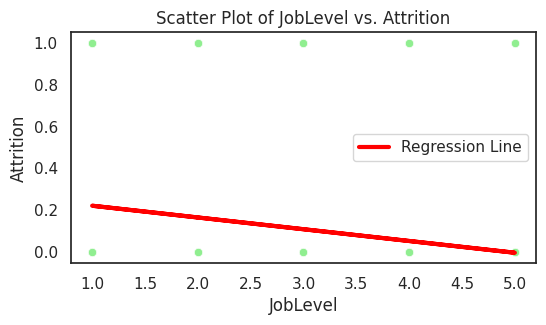

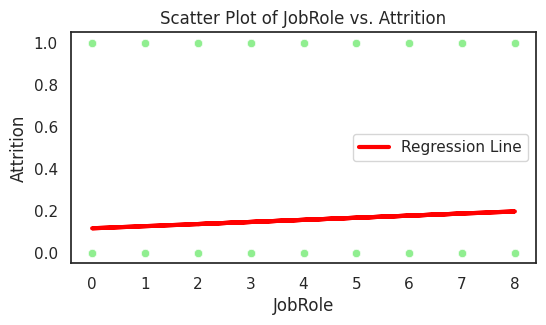

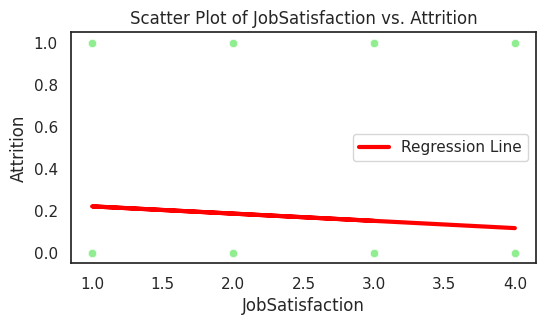

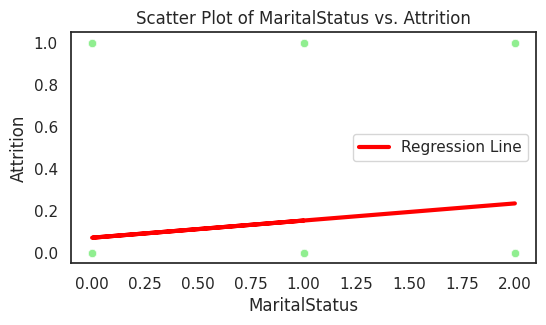

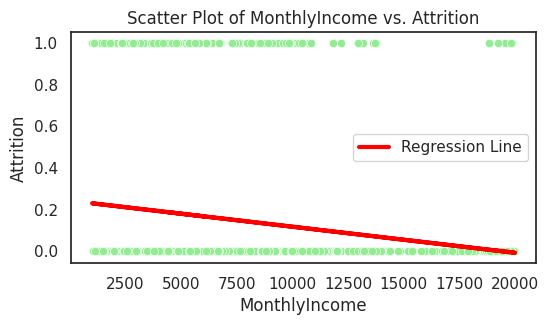

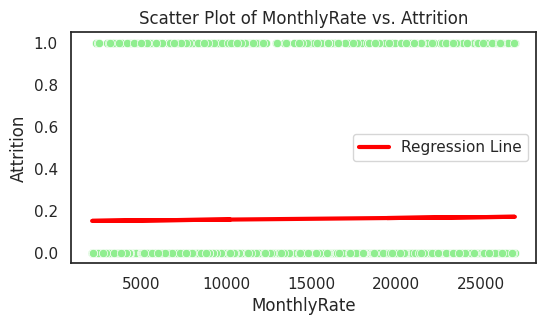

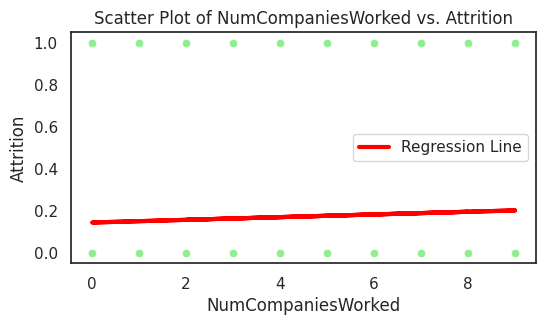

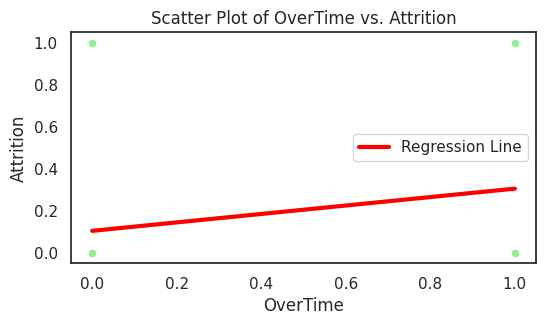

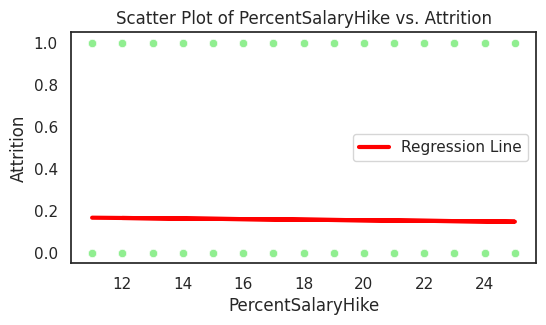

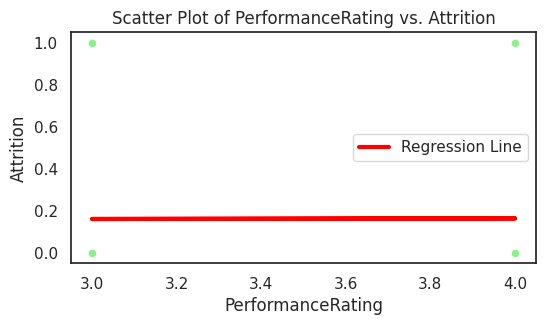

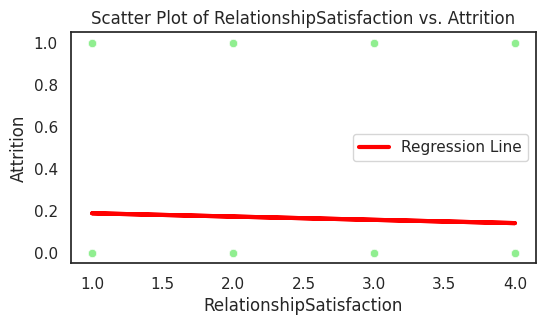

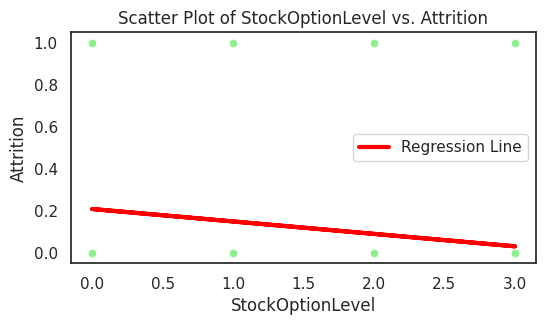

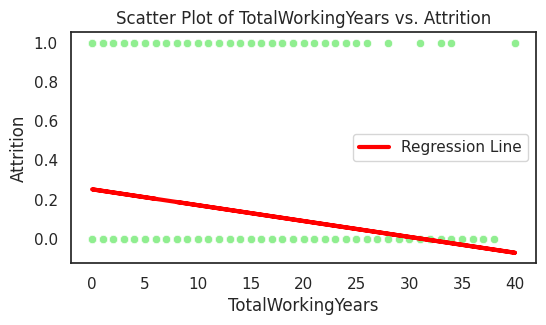

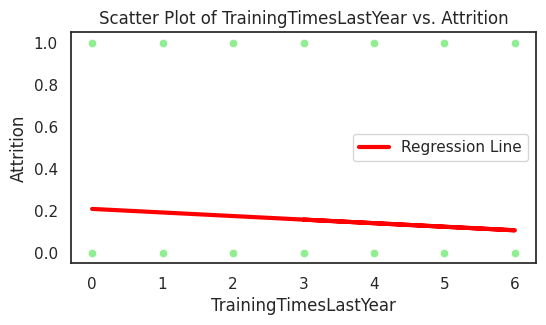

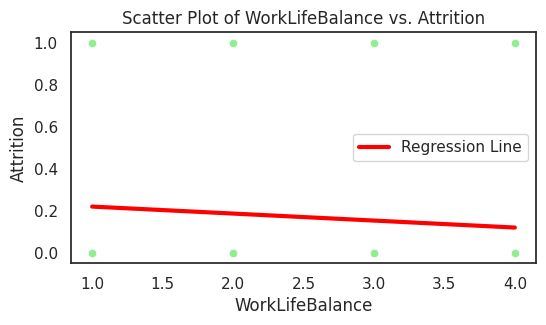

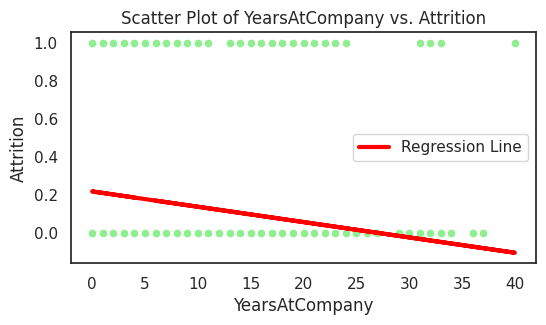

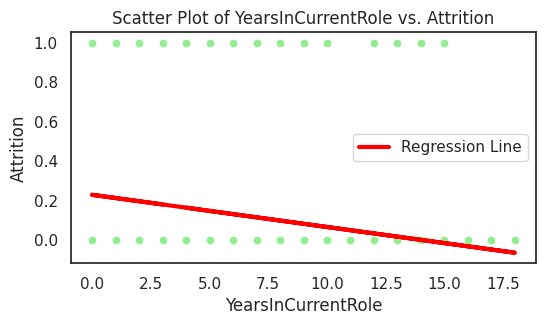

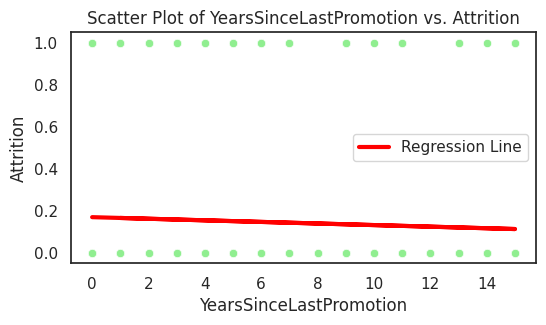

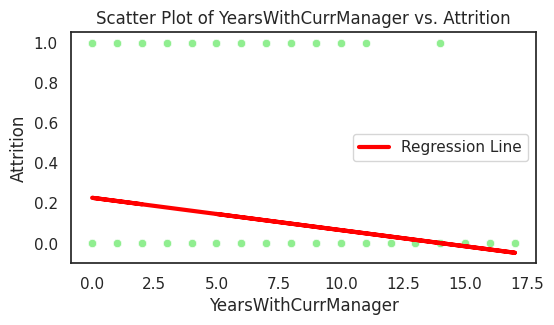

In [116]:
# Select numeric columns excluding 'Age'
numeric_columns = data.select_dtypes(include=np.number).columns.difference(['Age'])

# Loop through numeric columns
for column in numeric_columns:
    plt.figure(figsize=(6, 3))

    sns.scatterplot(x=column, y='Attrition', data=data)
    plt.title(f'Scatter Plot of {column} vs. Attrition')

    x = data[column]
    y = data['Attrition']
    slope, intercept = np.polyfit(x, y, 1)
    pred = slope * x + intercept

    plt.plot(x, pred, color='red', lw=3, label='Regression Line')
    plt.xlabel(column)
    plt.ylabel('Attrition')
    plt.legend()
    plt.show()


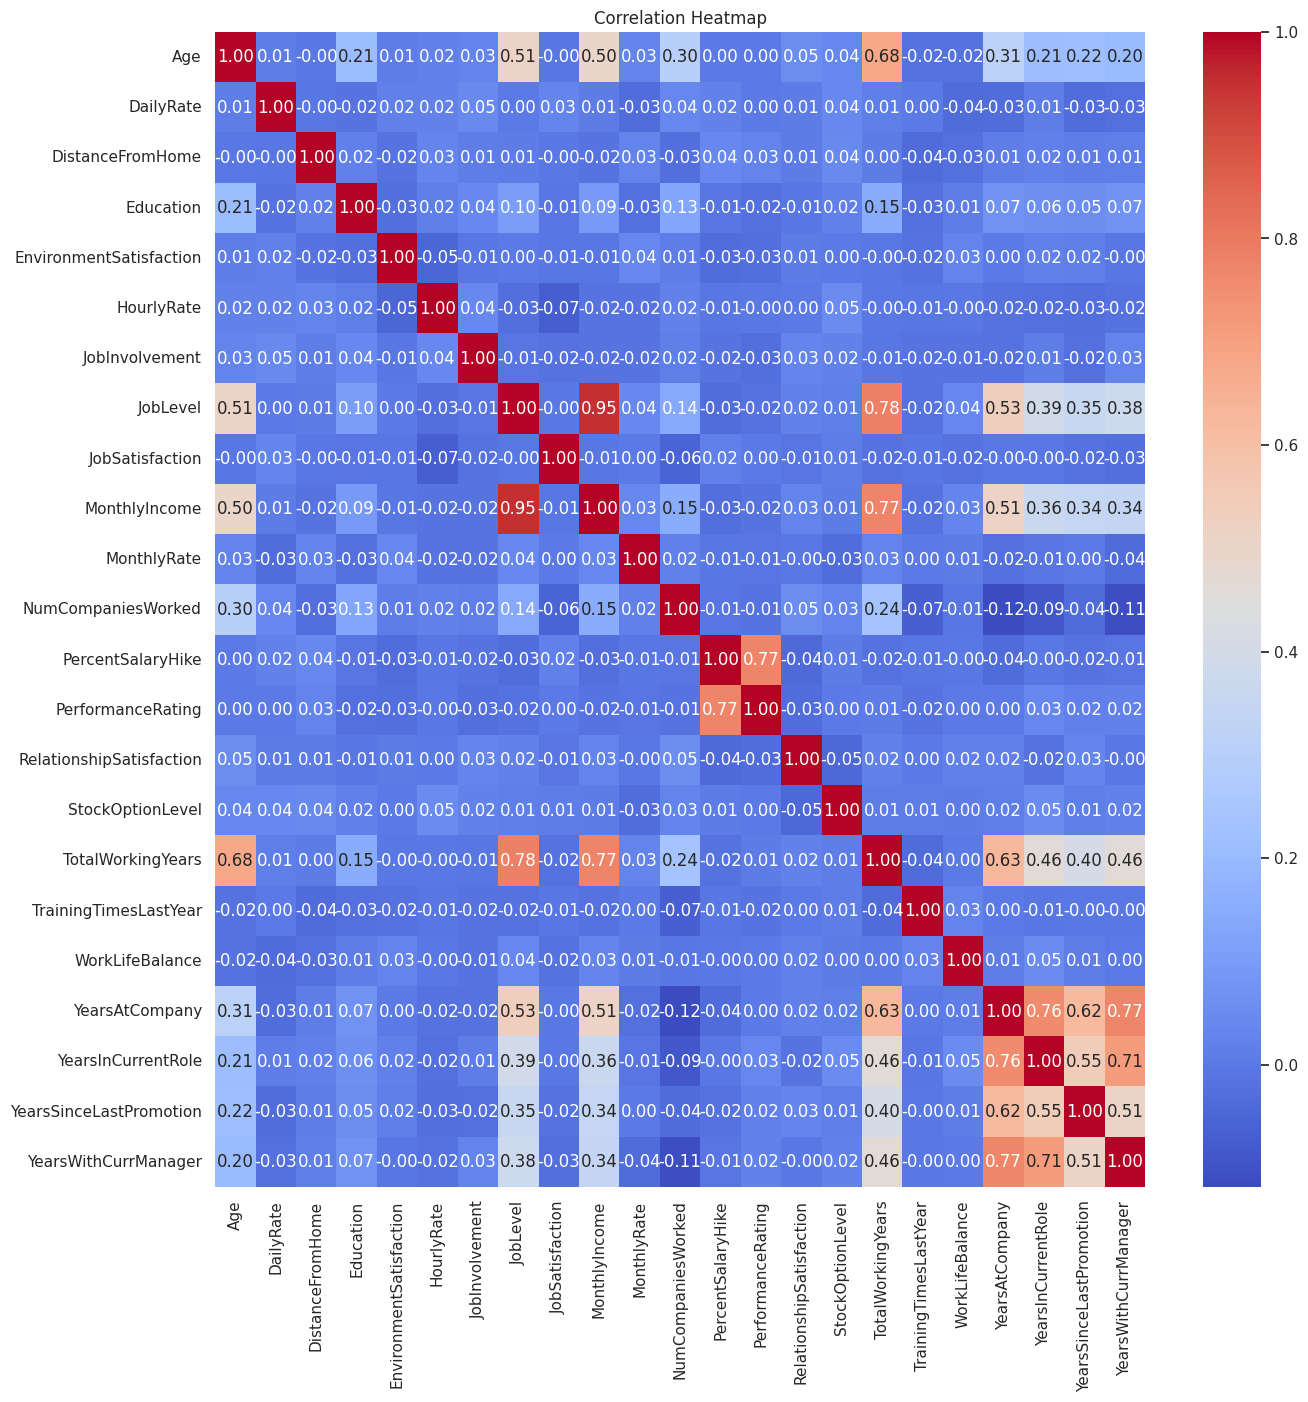

In [119]:
X = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
          'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
          'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
          'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = data['Attrition'].values.ravel()

plt.figure(figsize=(15, 15))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')  # Change the cmap to 'coolwarm'
plt.title('Correlation Heatmap')
plt.show()


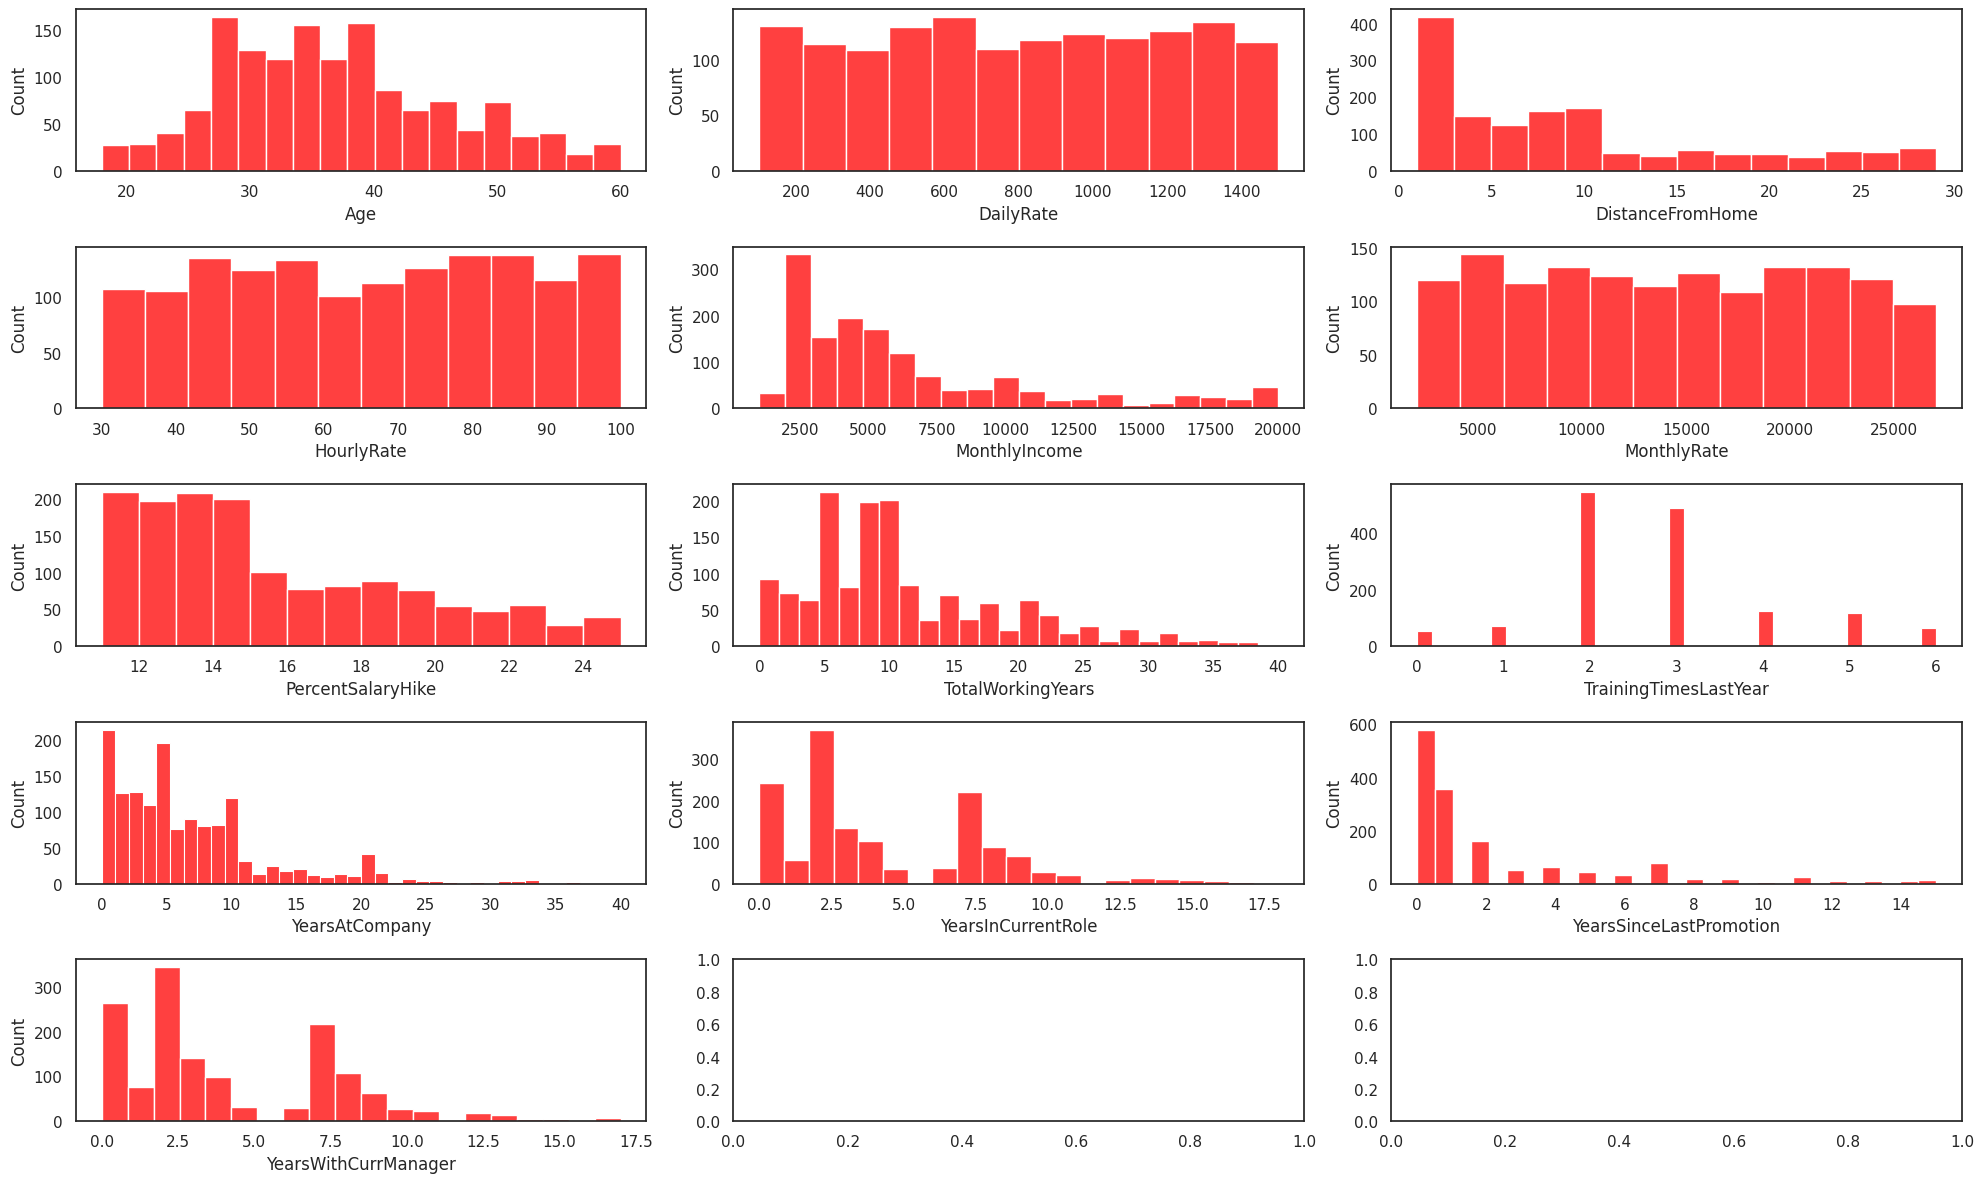

In [122]:
num_feat = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome',
            'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']
fig, ax = plt.subplots(5,3, figsize=(20, 12))
for i, j in zip(num_feat, ax.flatten()):
    sns.histplot(data[i], ax=j, color='red')
fig.tight_layout()
plt.show()

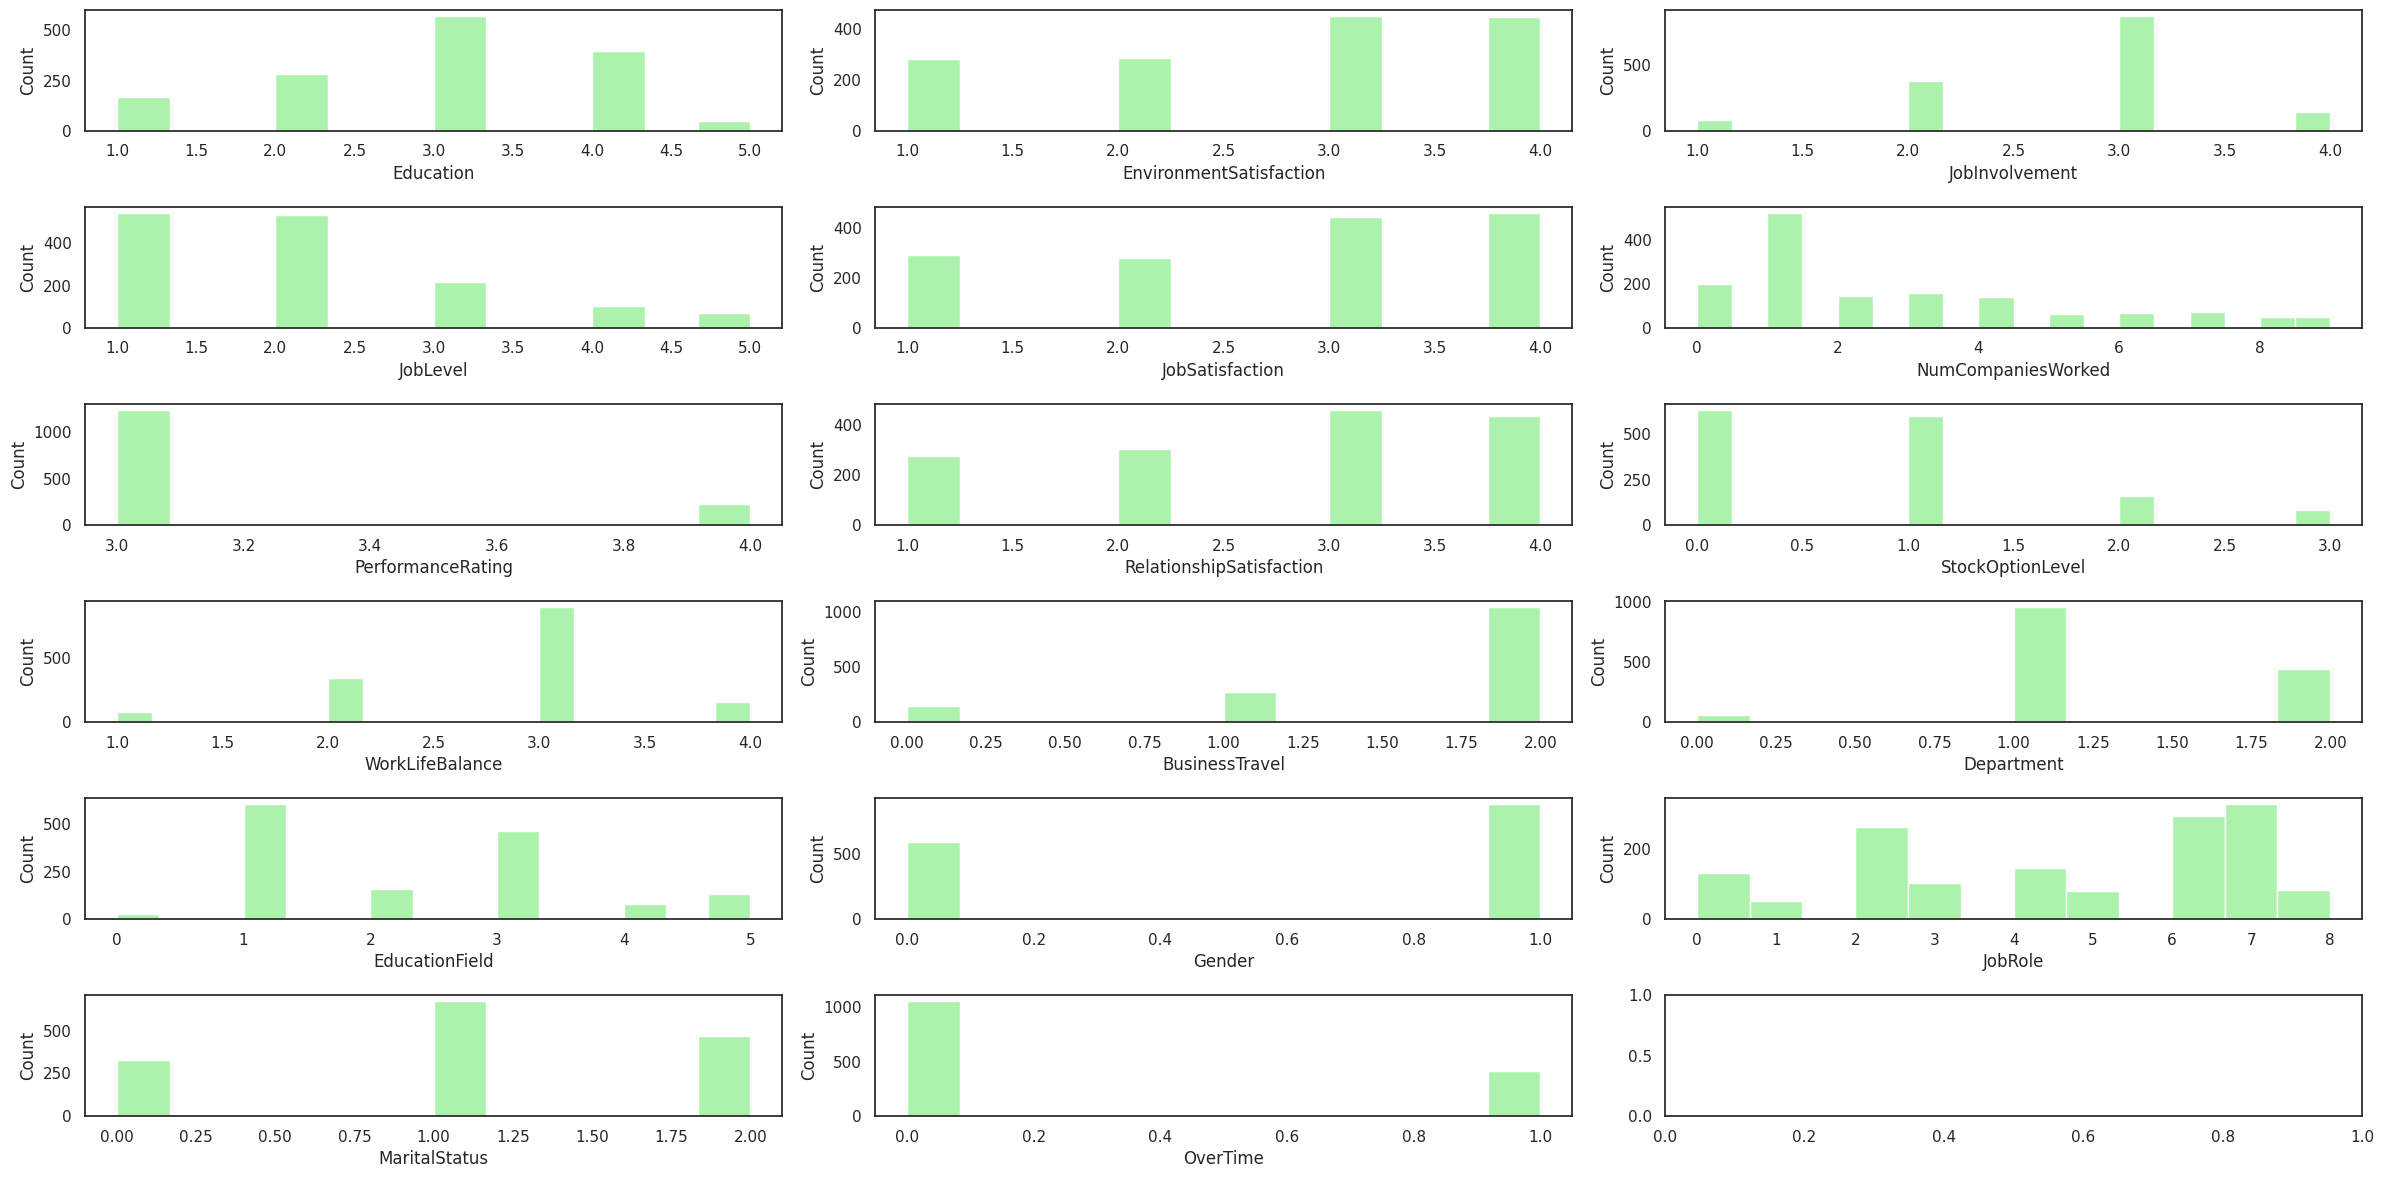

In [123]:
cat_feat = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
            'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
            'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
            'MaritalStatus', 'OverTime']
fig, ax = plt.subplots(6,3, figsize=(24, 12))
for i, j in zip(cat_feat, ax.flatten()):
    sns.histplot(data[i], ax=j)
fig.tight_layout()
plt.show()

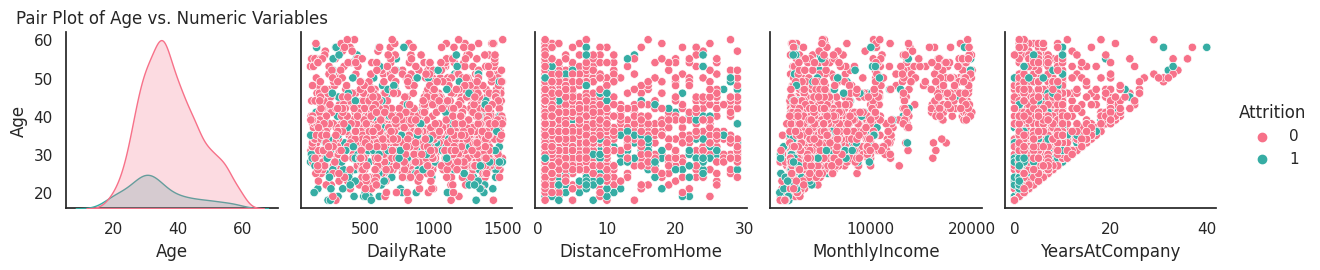

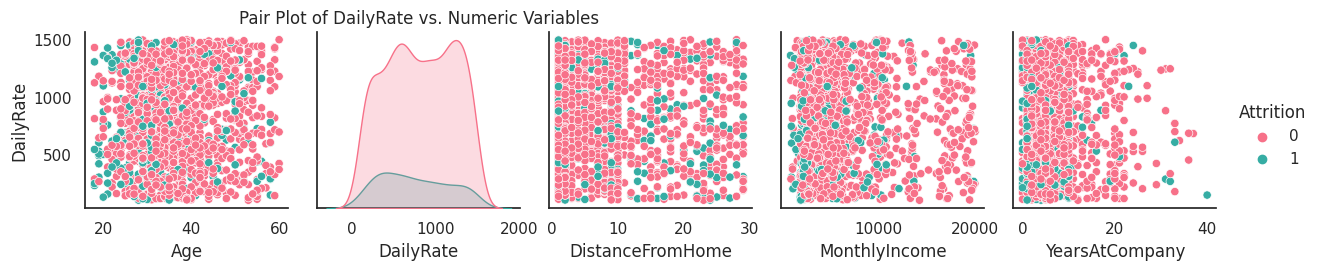

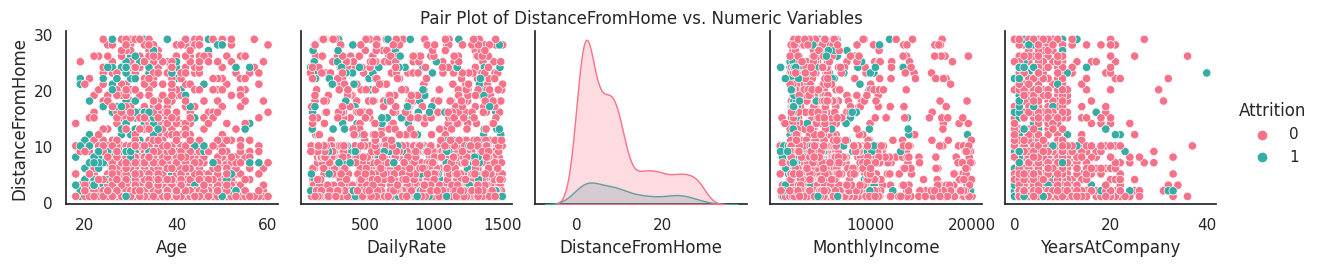

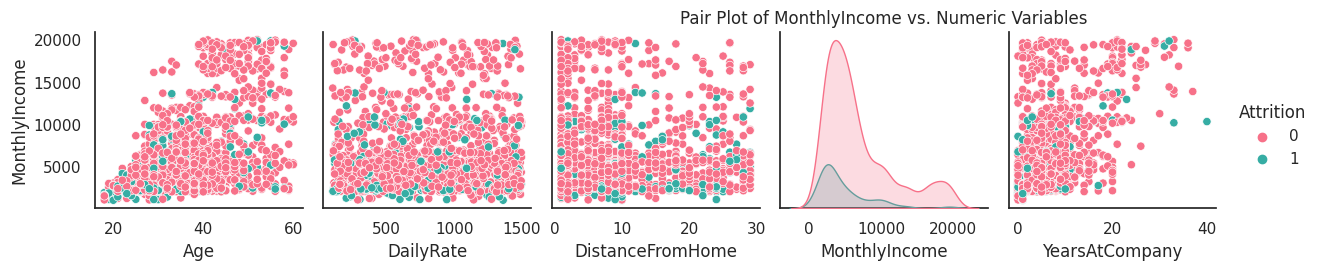

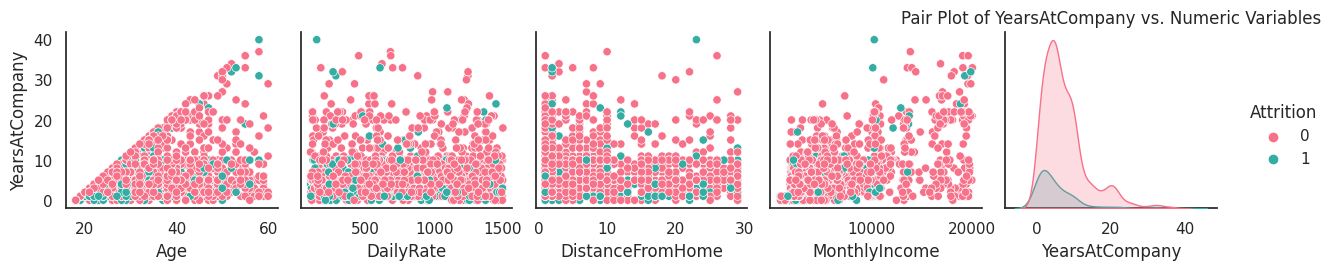

In [125]:
# Select a subset of numeric columns for pair plots
selected_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']

# Create pair plots using a loop
for column in selected_columns:
    sns.pairplot(data, hue='Attrition', x_vars=selected_columns, y_vars=[column])
    plt.title(f'Pair Plot of {column} vs. Numeric Variables')
    plt.show()


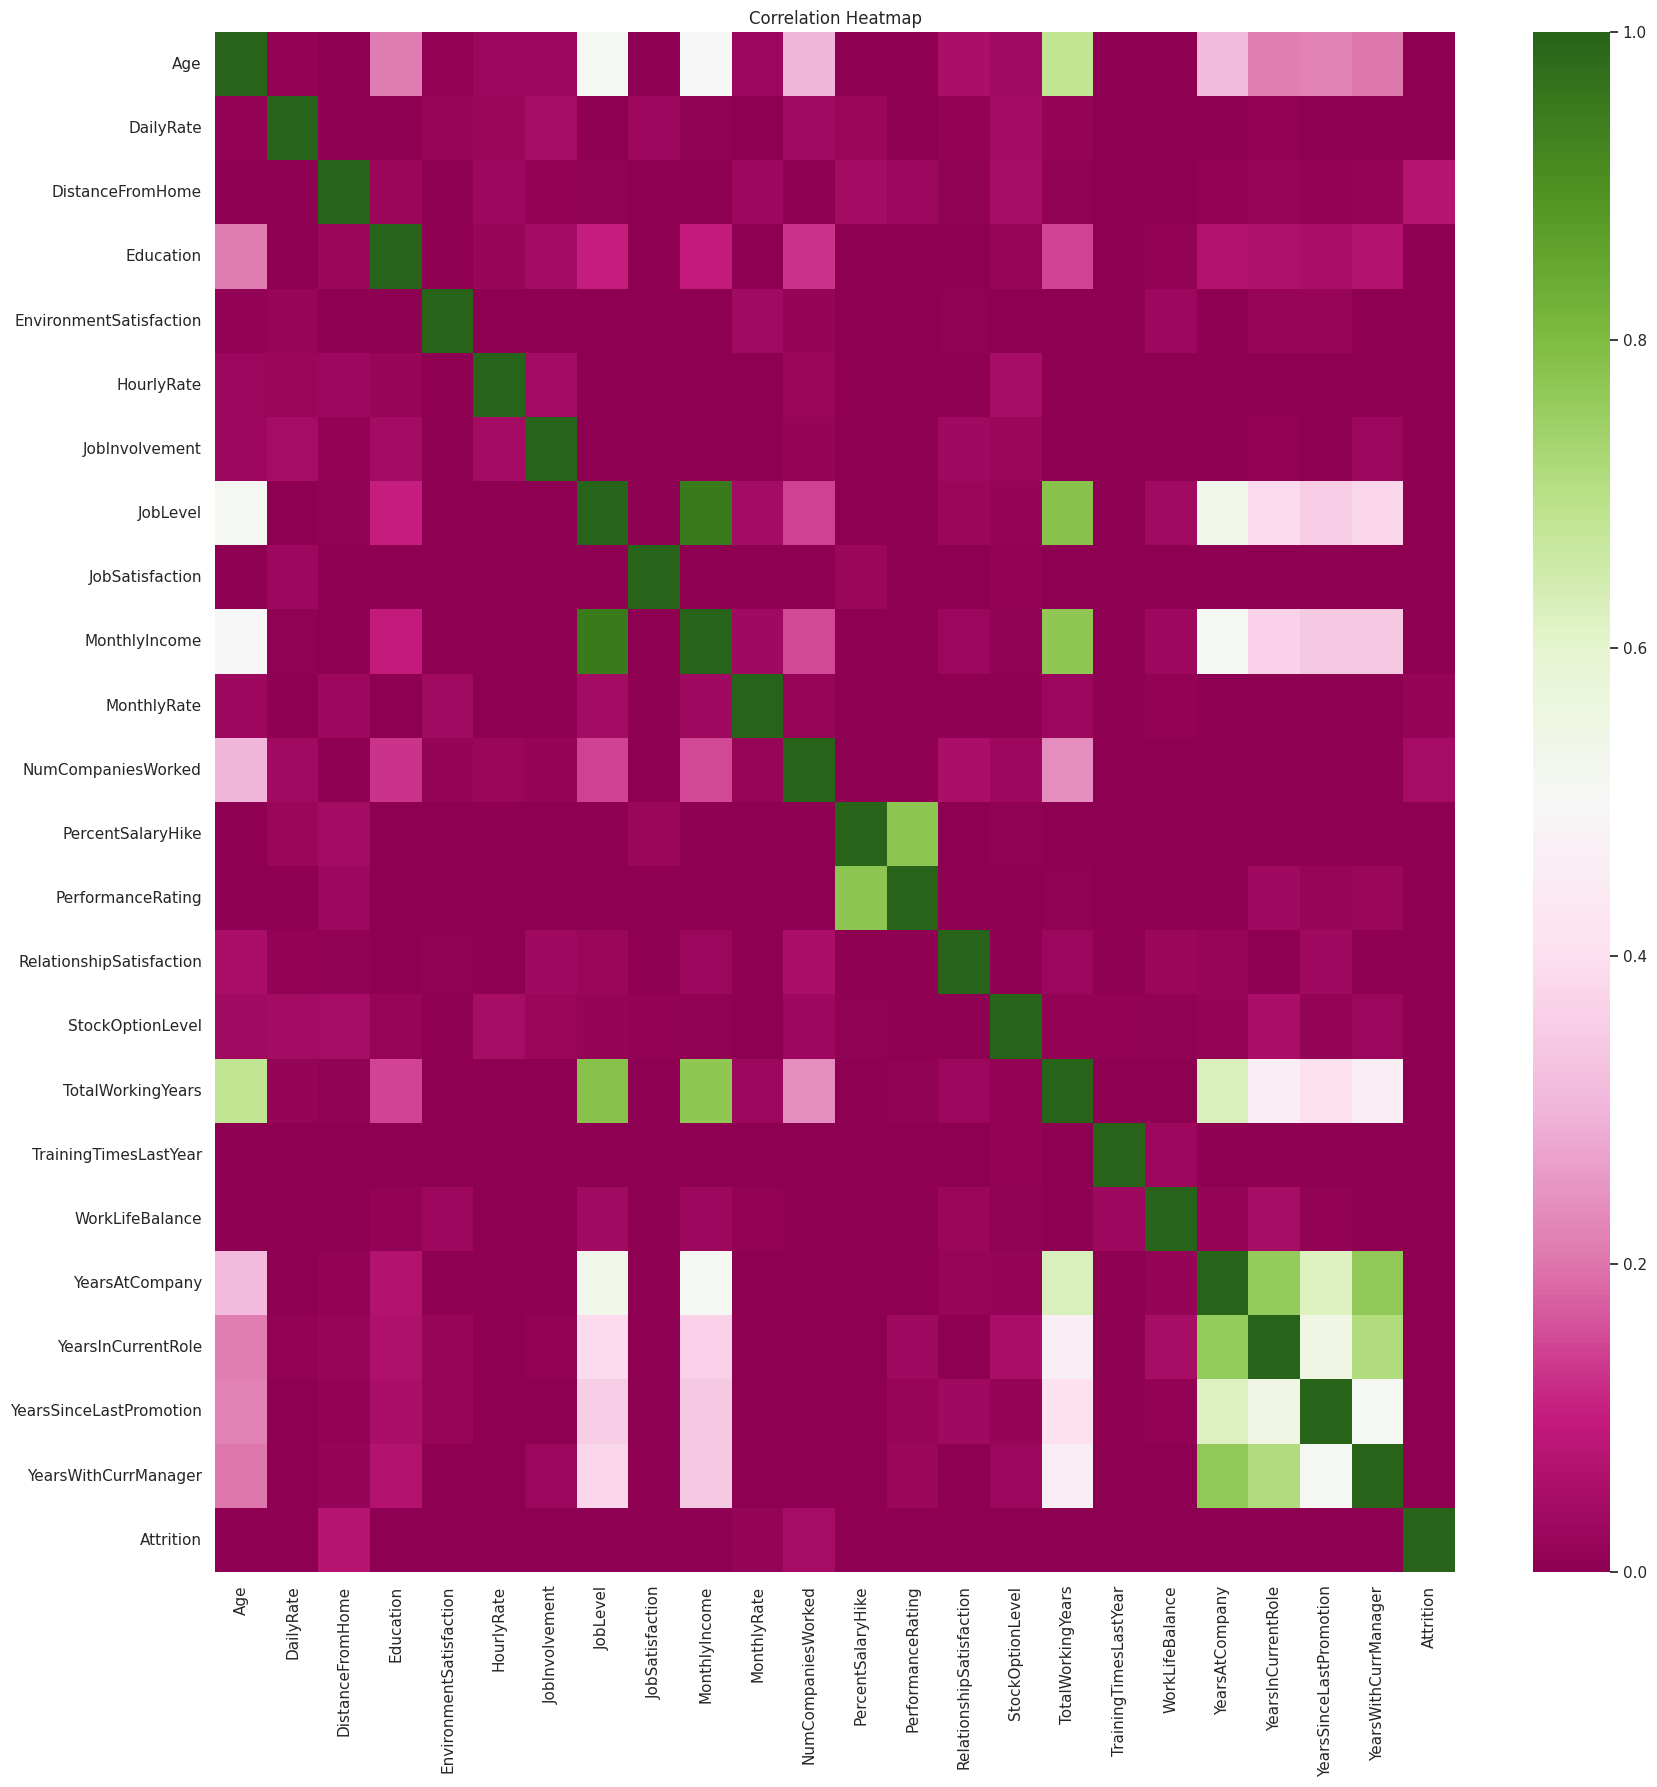

In [127]:
# Select columns for the heatmap
heatmap_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
                   'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                   'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                   'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']  # Add your target field here

# Calculate correlations
corr = data[heatmap_columns].corr()

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmin=0, vmax=1.0, cmap="PiYG")  # You can use your preferred colormap
plt.title('Correlation Heatmap')
plt.show()


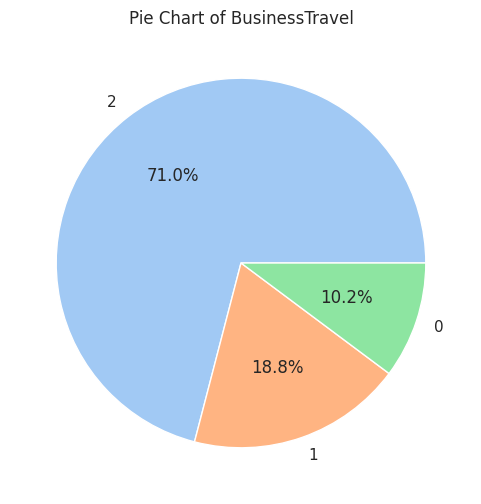

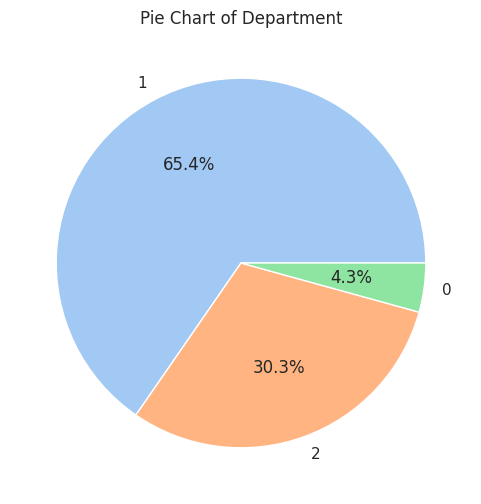

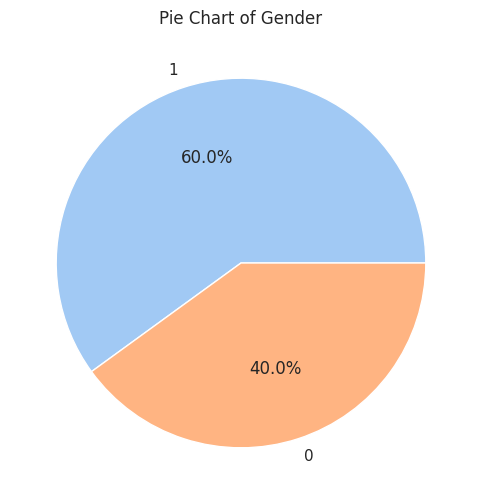

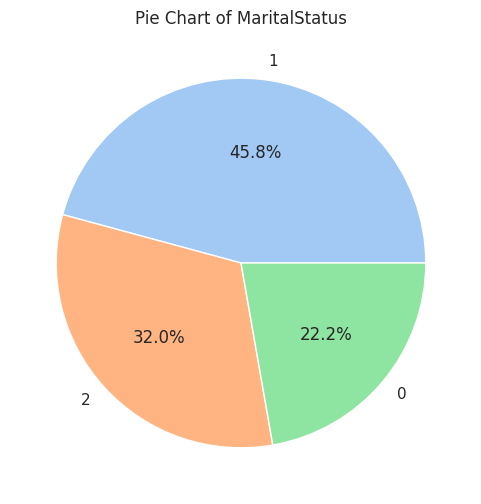

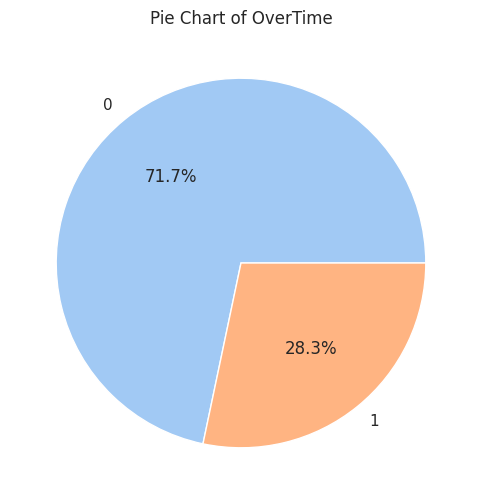

In [130]:
# Select categorical columns for pie charts
categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'OverTime']

# Create pie charts using a loop
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')
    plt.show()


**Analyzing Employee Attrition Dataset**

**Data Analysis Steps:**

Loaded the employee dataset and performed exploratory data analysis.
Explored the distribution of attrition, age, and job roles.
Created correlation heatmaps to understand relationships among numeric variables.
Generated scatter plots with regression lines to observe trends between selected variables and attrition.
Utilized pair plots to visualize relationships between numeric variables.
Examined the correlation matrix of selected numeric variables.

**Key Insights:**

Attrition distribution shows that a significant number of employees have left the company.
Age appears to have a moderate correlation with attrition, suggesting younger employees might leave more.
Job roles such as Sales Representative and Laboratory Technician have higher attrition rates.
Some numeric variables, like JobSatisfaction and EnvironmentSatisfaction, seem to correlate with attrition.
The scatter plots reveal potential linear trends between some numeric variables and attrition.
Correlation heatmaps provide insight into variable relationships and potential multicollinearity.

**Recommendations:**

Focus on understanding reasons for higher attrition among certain job roles.
Consider conducting employee satisfaction surveys to address job satisfaction concerns.
Explore opportunities to improve work-life balance and employee development.
Monitor and address attrition trends among younger employees.
Overall, this analysis provides valuable insights to guide HR strategies for reducing employee attrition and improving workplace satisfaction.

# **End of Analysis**